In [1]:
import os, sys, glob, csv
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# The GPU id to use, usually either "0" or "1"
# os.environ["CUDA_VISIBLE_DEVICES"]="1" 
import numpy as np
import pandas as pd
import shutil
import pickle
import tqdm
from tqdm import tqdm
import xlsxwriter
import random
from random import shuffle
from math import log, floor
import re
import collections
from collections import Counter
import string
import unicodedata as udata
import pause, datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from distutils.dir_util import copy_tree
import sklearn
from sklearn.metrics import *
import itertools as it

In [6]:
def basic_statistics(all_length):
    '''
    input: length list of elements
    output1: mean、std、mode、min、q1、median(q2)、q3、max、iqr、outlier、far out
    output2: statistics graph、10%~90% form
    '''
    stat_dict = {}
    stat_dict['mean'] = np.mean(all_length)
    stat_dict['std'] = np.std(all_length)
    stat_dict['mode'] = np.argmax(np.bincount(all_length))
    stat_dict['min'] = np.min(all_length)
    stat_dict['q1'] = np.quantile(all_length,0.25)
    stat_dict['median'] = np.quantile(all_length,0.5)
    stat_dict['q3'] = np.quantile(all_length,0.75)
    stat_dict['max'] = np.max(all_length)
    stat_dict['iqr'] = stat_dict['q3'] - stat_dict['q1']
    stat_dict['outlier'] = stat_dict['q3'] + 1.5*stat_dict['iqr']
    stat_dict['far_out'] = stat_dict['q3'] + 3*stat_dict['iqr']
    for i in [10,20,30,40,50,60,70,80,90,100]:
        stat_dict[str(i)+'%'] = np.percentile(all_length,i)
    return pd.DataFrame.from_dict(stat_dict,orient='index',columns=['length'])

# 需要
* tree-rep-profiles-o2o/
* tree-rep-profiles_one2one/

### 計算overall processes length dist.
* 包含small short & normal
* 目前還差了loner
* assertion test for checking dataset

In [10]:

root_dir = './data/tree-rep-profiles_one2one/'
# api_length = []
profile_length = []
processed_profile = []


rasmma_dir = next(os.walk(root_dir))[1]
for rasmma in rasmma_dir:
    fam_dir = next(os.walk(root_dir+rasmma))[1]
    for fam in tqdm(fam_dir):
        tree_dir = next(os.walk(root_dir +rasmma+'/'+ fam))[1]
        for tree in tree_dir:
            in_directory = root_dir+ rasmma+'/'+ fam +  '/' + tree + '/'
            hl_list = next(os.walk(in_directory))[2]
            hl_list = [os.path.join(in_directory, f) for f in hl_list]
            hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
            for profile in hl_list:
                name = profile.split('/')[-1]
                if name not in processed_profile:
                    with open(profile,encoding='ISO 8859-1') as f:
                        lines = f.read().splitlines()
                    processed_profile.append(name)
                    profile_length.append(len(lines))
                else:
                    paths = glob.glob(root_dir + '*/*/*/'+profile.split('/')[-1])
                    print('duplicate ERR:',paths)

len(processed_profile)

  0%|          | 0/159 [00:00<?, ?it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/151.brresmon_0.8/G17/3fb338d03c574cb7535ab5735de39eaf5c82c37f26b500f95aace158972cbb3b_2960.profile', './data/tree-rep-profiles_o2o_smallshort/short/151.brresmon_0.8/G17/3fb338d03c574cb7535ab5735de39eaf5c82c37f26b500f95aace158972cbb3b_2960.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/151.brresmon_0.8/G17/3fb338d03c574cb7535ab5735de39eaf5c82c37f26b500f95aace158972cbb3b_2892.profile', './data/tree-rep-profiles_o2o_smallshort/short/151.brresmon_0.8/G17/3fb338d03c574cb7535ab5735de39eaf5c82c37f26b500f95aace158972cbb3b_2892.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/18.domaiq_0.8/G345/9577445247f0d203e606f22edda7f3de6800649d783b9ad2607bb60c17cf1e08_3248.profile', './data/tree-rep-profiles_o2o_smallshort/short/18.domaiq_0.8/G345/9577445247f0d203e606f22edda7f3de6800649d783b9ad2607bb60c17cf1e08_3248.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/18.do

  1%|▏         | 2/159 [00:00<01:16,  2.05it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/18.domaiq_0.8/G302/091f32539679ee80a22962b5da70a7d96ec12da1d96b463c9b66ee2664d6cc55_3224.profile', './data/tree-rep-profiles_o2o_smallshort/short/18.domaiq_0.8/G302/091f32539679ee80a22962b5da70a7d96ec12da1d96b463c9b66ee2664d6cc55_3224.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/18.domaiq_0.8/G308/82386f6da0db0c35edf3afa527e65940b12663b2267ddaac61c478d2c0b7b8b3_3076.profile', './data/tree-rep-profiles_o2o_smallshort/short/18.domaiq_0.8/G308/82386f6da0db0c35edf3afa527e65940b12663b2267ddaac61c478d2c0b7b8b3_3076.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/18.domaiq_0.8/G308/0d9f4495510f39c0d4af39f6670db1dbeab5f8560171ae62620bbc57407b6098_3200.profile', './data/tree-rep-profiles_o2o_smallshort/short/18.domaiq_0.8/G308/0d9f4495510f39c0d4af39f6670db1dbeab5f8560171ae62620bbc57407b6098_3200.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/18.domaiq_0.8

  2%|▏         | 3/159 [00:01<01:00,  2.59it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/85.ipamor_0.8/G82/0283d3fcaee8d5c64df6eabd09f930f417a398a7b6902ad5c961b622e49e6da0_3336.profile', './data/tree-rep-profiles_o2o_smallshort/short/85.ipamor_0.8/G82/0283d3fcaee8d5c64df6eabd09f930f417a398a7b6902ad5c961b622e49e6da0_3336.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/85.ipamor_0.8/G82/0283d3fcaee8d5c64df6eabd09f930f417a398a7b6902ad5c961b622e49e6da0_3220.profile', './data/tree-rep-profiles_o2o_smallshort/short/85.ipamor_0.8/G82/0283d3fcaee8d5c64df6eabd09f930f417a398a7b6902ad5c961b622e49e6da0_3220.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/75.crytex_0.8/G60/b7bb64d4bd4be14273a7f3101a3757fe1705b6bfcb1f08e053350bc0a12d9211_3504.profile', './data/tree-rep-profiles_o2o_smallshort/short/75.crytex_0.8/G60/b7bb64d4bd4be14273a7f3101a3757fe1705b6bfcb1f08e053350bc0a12d9211_3504.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/75.crytex_0.8/G60/b

  3%|▎         | 4/159 [00:01<00:53,  2.89it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/75.crytex_0.8/G65/5b2e54dd8e0009ac9bb087bd5454d416f38311357ffd3493ef341229bc992ad8_3220.profile', './data/tree-rep-profiles_o2o_smallshort/short/75.crytex_0.8/G65/5b2e54dd8e0009ac9bb087bd5454d416f38311357ffd3493ef341229bc992ad8_3220.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/75.crytex_0.8/G65/028dbd4c06ae625fdb82ed254a8b945a4d2b4a8f15da4406daef76a051b5c70a_3244.profile', './data/tree-rep-profiles_o2o_smallshort/short/75.crytex_0.8/G65/028dbd4c06ae625fdb82ed254a8b945a4d2b4a8f15da4406daef76a051b5c70a_3244.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/75.crytex_0.8/G67/b7bb64d4bd4be14273a7f3101a3757fe1705b6bfcb1f08e053350bc0a12d9211_3364.profile', './data/tree-rep-profiles_o2o_smallshort/short/75.crytex_0.8/G67/b7bb64d4bd4be14273a7f3101a3757fe1705b6bfcb1f08e053350bc0a12d9211_3364.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/75.crytex_0.8/G67/b

  3%|▎         | 5/159 [00:01<00:44,  3.49it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/213.arqpcaf_0.8/G23/6dac800d8a34db09a8af2ad1c29aafc7e79bc271cb43dc674432e5bdc0081c96_3216.profile', './data/tree-rep-profiles_o2o_smallshort/short/213.arqpcaf_0.8/G23/6dac800d8a34db09a8af2ad1c29aafc7e79bc271cb43dc674432e5bdc0081c96_3216.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/65.smshoax_0.8/G75/0fe0cc4f596941f7c4301f324cc5cb15be90617d4a92be8651674cf40fcec158_3280.profile', './data/tree-rep-profiles_o2o_smallshort/short/65.smshoax_0.8/G75/0fe0cc4f596941f7c4301f324cc5cb15be90617d4a92be8651674cf40fcec158_3280.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/65.smshoax_0.8/G75/0fe0cc4f596941f7c4301f324cc5cb15be90617d4a92be8651674cf40fcec158_3388.profile', './data/tree-rep-profiles_o2o_smallshort/short/65.smshoax_0.8/G75/0fe0cc4f596941f7c4301f324cc5cb15be90617d4a92be8651674cf40fcec158_3388.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/65.smshoax_

  4%|▍         | 6/159 [00:01<00:49,  3.12it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/65.smshoax_0.8/G80/069ae80420b68965549e143427a1dda40ff469e6026eaa08129d72ec41dba77d_2844.profile', './data/tree-rep-profiles_o2o_smallshort/short/65.smshoax_0.8/G80/069ae80420b68965549e143427a1dda40ff469e6026eaa08129d72ec41dba77d_2844.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/65.smshoax_0.8/G73/0a5a9aff3d22b75c4549c67a75242940bf2e9b45341ab1a787a43446090dd875_3396.profile', './data/tree-rep-profiles_o2o_smallshort/short/65.smshoax_0.8/G73/0a5a9aff3d22b75c4549c67a75242940bf2e9b45341ab1a787a43446090dd875_3396.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/65.smshoax_0.8/G73/0fb5e75ed1f8ee46ac1a2adb4dbc6c8f94e2cf063bb1d6b357c47ab5c994aa7d_2904.profile', './data/tree-rep-profiles_o2o_smallshort/short/65.smshoax_0.8/G73/0fb5e75ed1f8ee46ac1a2adb4dbc6c8f94e2cf063bb1d6b357c47ab5c994aa7d_2904.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/65.smshoax_0.

  4%|▍         | 7/159 [00:02<00:50,  3.03it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/61.virlock_0.8/G94/184cd0c740316c3c3f60584aadce548f62680144e30ec35b55c7e7e09c16be5c_3356.profile', './data/tree-rep-profiles_o2o_smallshort/short/61.virlock_0.8/G94/184cd0c740316c3c3f60584aadce548f62680144e30ec35b55c7e7e09c16be5c_3356.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/61.virlock_0.8/G82/d037fe03233f22d14df6d6cc800a7c109266c1cd916611792d1dd9f7bc404fac_3344.profile', './data/tree-rep-profiles_o2o_smallshort/short/61.virlock_0.8/G82/d037fe03233f22d14df6d6cc800a7c109266c1cd916611792d1dd9f7bc404fac_3344.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/61.virlock_0.8/G82/65632be868af44045475e7d529c732ec8718e1a43921b20bc4504ecb846be5a6_2904.profile', './data/tree-rep-profiles_o2o_smallshort/short/61.virlock_0.8/G82/65632be868af44045475e7d529c732ec8718e1a43921b20bc4504ecb846be5a6_2904.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/61.virlock_0.

  6%|▌         | 9/159 [00:02<00:38,  3.94it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/102.vundo_0.8/G30/0d0f63f285ea91e62201e1e90fd079b1507dfec39142efdd34f13029df410e8e_3244.profile', './data/tree-rep-profiles_o2o_smallshort/short/102.vundo_0.8/G30/0d0f63f285ea91e62201e1e90fd079b1507dfec39142efdd34f13029df410e8e_3244.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/102.vundo_0.8/G31/0b305b489f8da7c4bd0fe1702effbb1fd58de8a5d8b0c49947cd75536f82c349_3020.profile', './data/tree-rep-profiles_o2o_smallshort/short/102.vundo_0.8/G31/0b305b489f8da7c4bd0fe1702effbb1fd58de8a5d8b0c49947cd75536f82c349_3020.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/102.vundo_0.8/G31/11d2758916990181a746d1595bf3746ce939e4919e3d0d5babfee12c69c01451_3260.profile', './data/tree-rep-profiles_o2o_smallshort/short/102.vundo_0.8/G31/11d2758916990181a746d1595bf3746ce939e4919e3d0d5babfee12c69c01451_3260.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/11.zusy_0.8/G459/69

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/11.zusy_0.8/G524/b367165aab9ecec288eee4f244964716976af243166bac23b703fb7004a284ee_3348.profile', './data/tree-rep-profiles_o2o_smallshort/short/11.zusy_0.8/G524/b367165aab9ecec288eee4f244964716976af243166bac23b703fb7004a284ee_3348.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/11.zusy_0.8/G524/b367165aab9ecec288eee4f244964716976af243166bac23b703fb7004a284ee_3208.profile', './data/tree-rep-profiles_o2o_smallshort/short/11.zusy_0.8/G524/b367165aab9ecec288eee4f244964716976af243166bac23b703fb7004a284ee_3208.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/11.zusy_0.8/G503/001f8b9cbcb14171ff8906e9da7526b2bbf96a6fdc2826279ad27d83ee9e9535_3328.profile', './data/tree-rep-profiles_o2o_smallshort/short/11.zusy_0.8/G503/001f8b9cbcb14171ff8906e9da7526b2bbf96a6fdc2826279ad27d83ee9e9535_3328.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/11.zusy_0.8/G503/002e0204

  6%|▋         | 10/159 [00:03<01:25,  1.75it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/11.zusy_0.8/G498/8f18c7d09bf6ccc0fb6a44ad67c1035ad408214ebc1d3c2b362d8d8dfe7d1060_2988.profile', './data/tree-rep-profiles_o2o_smallshort/short/11.zusy_0.8/G498/8f18c7d09bf6ccc0fb6a44ad67c1035ad408214ebc1d3c2b362d8d8dfe7d1060_2988.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/11.zusy_0.8/G534/4a4ad8e944ba10e65dfdea0622cb6fd2f41bc9884bbab74bd55dab373b62382b_3344.profile', './data/tree-rep-profiles_o2o_smallshort/short/11.zusy_0.8/G534/4a4ad8e944ba10e65dfdea0622cb6fd2f41bc9884bbab74bd55dab373b62382b_3344.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/11.zusy_0.8/G534/00a8d77da1e9383d30408fd341bb3c4ae8ab16d4c0617633d091c635443108f2_3400.profile', './data/tree-rep-profiles_o2o_smallshort/short/11.zusy_0.8/G534/00a8d77da1e9383d30408fd341bb3c4ae8ab16d4c0617633d091c635443108f2_3400.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/2.zbot_0.8/G1035/bab402f5

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/2.zbot_0.8/G1078/4c3f7678e21fbec645a2d8cfa95f0a05a3b3472dab7fef60dff17b44b70846b2_3424.profile', './data/tree-rep-profiles_o2o_smallshort/short/2.zbot_0.8/G1078/4c3f7678e21fbec645a2d8cfa95f0a05a3b3472dab7fef60dff17b44b70846b2_3424.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/2.zbot_0.8/G1078/e8779b1f050677620b4daa940a1f0b1b0390b414a52242daad7b607e917153a5_3276.profile', './data/tree-rep-profiles_o2o_smallshort/short/2.zbot_0.8/G1078/e8779b1f050677620b4daa940a1f0b1b0390b414a52242daad7b607e917153a5_3276.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/2.zbot_0.8/G1029/88138e962a0532e945669c3a62bb4709c51328a00eb7963a1d6944b433e7b141_3340.profile', './data/tree-rep-profiles_o2o_smallshort/short/2.zbot_0.8/G1029/88138e962a0532e945669c3a62bb4709c51328a00eb7963a1d6944b433e7b141_3340.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/2.zbot_0.8/G1029/1d9576f7

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/2.zbot_0.8/G1207/0d81b7a12eddbc9c01b50522edb840a9901f900c9e5b44c2de9ed827dc01a2fc_3484.profile', './data/tree-rep-profiles_o2o_smallshort/short/2.zbot_0.8/G1207/0d81b7a12eddbc9c01b50522edb840a9901f900c9e5b44c2de9ed827dc01a2fc_3484.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/2.zbot_0.8/G1096/1fb346e5b0791a6ce690371eb29faef156ce77312fba21efb1359ac4ff786083_3208.profile', './data/tree-rep-profiles_o2o_smallshort/short/2.zbot_0.8/G1096/1fb346e5b0791a6ce690371eb29faef156ce77312fba21efb1359ac4ff786083_3208.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/2.zbot_0.8/G1096/0b1d390424d37e9105aa7e7ded178a0ac46ff69cade13ad14283cff299b11175_3428.profile', './data/tree-rep-profiles_o2o_smallshort/short/2.zbot_0.8/G1096/0b1d390424d37e9105aa7e7ded178a0ac46ff69cade13ad14283cff299b11175_3428.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/2.zbot_0.8/G1141/58ef211a

  7%|▋         | 11/159 [00:06<02:58,  1.21s/it]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/2.zbot_0.8/G1100/0ba1a9020add6f5f9934e73c7640c2a2c5a38c8161f051637d13b70355ff1361_3340.profile', './data/tree-rep-profiles_o2o_smallshort/short/2.zbot_0.8/G1100/0ba1a9020add6f5f9934e73c7640c2a2c5a38c8161f051637d13b70355ff1361_3340.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/2.zbot_0.8/G1100/0a78ce2b8288ca132c2096103ce46b71d65df5cc1bf766707452f2fa2a78297c_3228.profile', './data/tree-rep-profiles_o2o_smallshort/short/2.zbot_0.8/G1100/0a78ce2b8288ca132c2096103ce46b71d65df5cc1bf766707452f2fa2a78297c_3228.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/2.zbot_0.8/G1215/03ee844b3e45605724541d36d63e89424ad968f53509a92297692626af163db4_3264.profile', './data/tree-rep-profiles_o2o_smallshort/short/2.zbot_0.8/G1215/03ee844b3e45605724541d36d63e89424ad968f53509a92297692626af163db4_3264.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/2.zbot_0.8/G1215/0dc0927f

  8%|▊         | 12/159 [00:06<02:08,  1.14it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/82.madangel_0.8/G65/bf047271ef501b7a822d09e3cb78bbc9b5300cbe77b6094430ca4d51c2ba792f_2920.profile', './data/tree-rep-profiles_o2o_smallshort/short/82.madangel_0.8/G65/bf047271ef501b7a822d09e3cb78bbc9b5300cbe77b6094430ca4d51c2ba792f_2920.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/82.madangel_0.8/G65/7c0d7f01fa27ae6baee66747839253fd42998e4af410b62b40ae156c29de1604_3296.profile', './data/tree-rep-profiles_o2o_smallshort/short/82.madangel_0.8/G65/7c0d7f01fa27ae6baee66747839253fd42998e4af410b62b40ae156c29de1604_3296.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/158.amonetize_0.8/G19/0ab0e0b6ef452eca7e8a1daa98080a401d6139bd53d7c874e4ba0ac148d1255e_3064.profile', './data/tree-rep-profiles_o2o_smallshort/short/158.amonetize_0.8/G19/0ab0e0b6ef452eca7e8a1daa98080a401d6139bd53d7c874e4ba0ac148d1255e_3064.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/158

  9%|▉         | 14/159 [00:07<01:49,  1.33it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/26.autoit_0.8/G228/0fcb083914f9fbee5db93515d3a9d153cd2089e3324dc68d560f009d61c4443f_2924.profile', './data/tree-rep-profiles_o2o_smallshort/short/26.autoit_0.8/G228/0fcb083914f9fbee5db93515d3a9d153cd2089e3324dc68d560f009d61c4443f_2924.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/26.autoit_0.8/G228/0c233b008b692aed851165565eda2b4801272dd42505024a8c4581364b1fe871_2988.profile', './data/tree-rep-profiles_o2o_smallshort/short/26.autoit_0.8/G228/0c233b008b692aed851165565eda2b4801272dd42505024a8c4581364b1fe871_2988.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/26.autoit_0.8/G242/1deac90357444c3fe3190a8f53315a0f6992099ea246f508b0607c188f42d807_2840.profile', './data/tree-rep-profiles_o2o_smallshort/short/26.autoit_0.8/G242/1deac90357444c3fe3190a8f53315a0f6992099ea246f508b0607c188f42d807_2840.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/26.autoit_0.8

 10%|█         | 16/159 [00:07<01:17,  1.84it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/148.dldpk_0.8/G21/1a566be9f7ae6c58b501743f6af880ad4ef3a3ead1e34099f1b4f5f42e3d08d5_3516.profile', './data/tree-rep-profiles_o2o_smallshort/short/148.dldpk_0.8/G21/1a566be9f7ae6c58b501743f6af880ad4ef3a3ead1e34099f1b4f5f42e3d08d5_3516.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/148.dldpk_0.8/G21/1a566be9f7ae6c58b501743f6af880ad4ef3a3ead1e34099f1b4f5f42e3d08d5_3524.profile', './data/tree-rep-profiles_o2o_smallshort/short/148.dldpk_0.8/G21/1a566be9f7ae6c58b501743f6af880ad4ef3a3ead1e34099f1b4f5f42e3d08d5_3524.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/57.vilsel_0.8/G319/0068b5e330bafc5624ab51ced85489e2f973513e10340a2851f080f0468c6140_3404.profile', './data/tree-rep-profiles_o2o_smallshort/short/57.vilsel_0.8/G319/0068b5e330bafc5624ab51ced85489e2f973513e10340a2851f080f0468c6140_3404.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/57.vilsel_0.8/G31

 11%|█         | 17/159 [00:07<01:05,  2.18it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/57.vilsel_0.8/G351/b55b5977676707c2f11a01cacefbdabe560c3192d24186fb3993f5b78b659c42_3372.profile', './data/tree-rep-profiles_o2o_smallshort/short/57.vilsel_0.8/G351/b55b5977676707c2f11a01cacefbdabe560c3192d24186fb3993f5b78b659c42_3372.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/57.vilsel_0.8/G351/1530a06339f274b98b7e03765befda08afb7d9316ccfd1c7e74bde8f896d5900_3320.profile', './data/tree-rep-profiles_o2o_smallshort/short/57.vilsel_0.8/G351/1530a06339f274b98b7e03765befda08afb7d9316ccfd1c7e74bde8f896d5900_3320.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/57.vilsel_0.8/G316/02e852c39629f12613b7cc7e7f3a0b37ca48511b69df54e3d383244e88bf57ab_3320.profile', './data/tree-rep-profiles_o2o_smallshort/short/57.vilsel_0.8/G316/02e852c39629f12613b7cc7e7f3a0b37ca48511b69df54e3d383244e88bf57ab_3320.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/57.vilsel_0.8

 12%|█▏        | 19/159 [00:08<01:01,  2.29it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/25.browsefox_0.8/G294/d25dd0bfe37cc20c532441ab85112d561dc0640862f25541eb0021a3fb7bad7f_3296.profile', './data/tree-rep-profiles_o2o_smallshort/short/25.browsefox_0.8/G294/d25dd0bfe37cc20c532441ab85112d561dc0640862f25541eb0021a3fb7bad7f_3296.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/25.browsefox_0.8/G282/d3817de6f910a4a5fc4d593428c24d9603a37f4be9adb4d11fae011dd346866e_3320.profile', './data/tree-rep-profiles_o2o_smallshort/short/25.browsefox_0.8/G282/d3817de6f910a4a5fc4d593428c24d9603a37f4be9adb4d11fae011dd346866e_3320.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/25.browsefox_0.8/G282/d3817de6f910a4a5fc4d593428c24d9603a37f4be9adb4d11fae011dd346866e_3268.profile', './data/tree-rep-profiles_o2o_smallshort/short/25.browsefox_0.8/G282/d3817de6f910a4a5fc4d593428c24d9603a37f4be9adb4d11fae011dd346866e_3268.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/s

 13%|█▎        | 21/159 [00:08<00:45,  3.06it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/137.vbna_0.8/G21/df3073fa75fcdd344918fce7bada05260d59b9acf63a3564e9e2fcbda282c256_3440.profile', './data/tree-rep-profiles_o2o_smallshort/short/137.vbna_0.8/G21/df3073fa75fcdd344918fce7bada05260d59b9acf63a3564e9e2fcbda282c256_3440.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/137.vbna_0.8/G21/eefe0807244b0257543843526f695d1564421ef13b05b92e7195792ac017014d_3300.profile', './data/tree-rep-profiles_o2o_smallshort/short/137.vbna_0.8/G21/eefe0807244b0257543843526f695d1564421ef13b05b92e7195792ac017014d_3300.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/137.vbna_0.8/G20/df3073fa75fcdd344918fce7bada05260d59b9acf63a3564e9e2fcbda282c256_3328.profile', './data/tree-rep-profiles_o2o_smallshort/short/137.vbna_0.8/G20/df3073fa75fcdd344918fce7bada05260d59b9acf63a3564e9e2fcbda282c256_3328.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/137.vbna_0.8/G20/0067b9a6

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/20.ramnit_0.8/G432/1e6ece94123cd0f22f5985642fcdc67a69a1288a4aa0c4532d82df94813d243e_3256.profile', './data/tree-rep-profiles_o2o_smallshort/short/20.ramnit_0.8/G432/1e6ece94123cd0f22f5985642fcdc67a69a1288a4aa0c4532d82df94813d243e_3256.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/20.ramnit_0.8/G468/033be654073d1da3aff83a58b019af939a6f10166f92ec99dac4654703fe1b36_2912.profile', './data/tree-rep-profiles_o2o_smallshort/short/20.ramnit_0.8/G468/033be654073d1da3aff83a58b019af939a6f10166f92ec99dac4654703fe1b36_2912.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/20.ramnit_0.8/G468/06ea8239931431991b219f53c2e4dbf208a69da1fb1d3bdbe6f89f71a32baedd_3232.profile', './data/tree-rep-profiles_o2o_smallshort/short/20.ramnit_0.8/G468/06ea8239931431991b219f53c2e4dbf208a69da1fb1d3bdbe6f89f71a32baedd_3232.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/20.ramnit_0.8

 14%|█▍        | 22/159 [00:10<01:28,  1.54it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/20.ramnit_0.8/G442/1fa0c2fa319f7f8a4ea75a7e2d3555fe319bd26cadeb2fc43c2f31b291d8a6a3_3304.profile', './data/tree-rep-profiles_o2o_smallshort/short/20.ramnit_0.8/G442/1fa0c2fa319f7f8a4ea75a7e2d3555fe319bd26cadeb2fc43c2f31b291d8a6a3_3304.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/101.banker_0.8/G31/131b6db91b63d56208e2ca25877ff81f80d6ebb9666380323aaeb44af89d4aac_2872.profile', './data/tree-rep-profiles_o2o_smallshort/short/101.banker_0.8/G31/131b6db91b63d56208e2ca25877ff81f80d6ebb9666380323aaeb44af89d4aac_2872.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/101.banker_0.8/G31/13e09cb9979d42ccab61246f0a9001dfafbee35311660907e351a7522557d80d_2812.profile', './data/tree-rep-profiles_o2o_smallshort/short/101.banker_0.8/G31/13e09cb9979d42ccab61246f0a9001dfafbee35311660907e351a7522557d80d_2812.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/19.installcor

 15%|█▌        | 24/159 [00:11<01:21,  1.65it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/19.installcore_0.8/G327/c1c8cf53bc5d89898ded8bec779500caff97f7c77023e88acc799b3d39257322_3320.profile', './data/tree-rep-profiles_o2o_smallshort/short/19.installcore_0.8/G327/c1c8cf53bc5d89898ded8bec779500caff97f7c77023e88acc799b3d39257322_3320.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/19.installcore_0.8/G323/08abd62ce89a4b28dcbfb0d8bb7ff6804beb9ce87ea7e35614f990a8da46113b_3272.profile', './data/tree-rep-profiles_o2o_smallshort/short/19.installcore_0.8/G323/08abd62ce89a4b28dcbfb0d8bb7ff6804beb9ce87ea7e35614f990a8da46113b_3272.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/19.installcore_0.8/G323/08db7885316b736b447fd96418054265d111659f671c321ec2d8f7fcb1c0e2b5_3156.profile', './data/tree-rep-profiles_o2o_smallshort/short/19.installcore_0.8/G323/08db7885316b736b447fd96418054265d111659f671c321ec2d8f7fcb1c0e2b5_3156.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/17.sality_0.8/G333/64029aae511cbfe5334ee3b8780713f3fae12784f3ac3f7a8605245ff5ebc8a7_3280.profile', './data/tree-rep-profiles_o2o_smallshort/short/17.sality_0.8/G333/64029aae511cbfe5334ee3b8780713f3fae12784f3ac3f7a8605245ff5ebc8a7_3280.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/17.sality_0.8/G333/64029aae511cbfe5334ee3b8780713f3fae12784f3ac3f7a8605245ff5ebc8a7_3416.profile', './data/tree-rep-profiles_o2o_smallshort/short/17.sality_0.8/G333/64029aae511cbfe5334ee3b8780713f3fae12784f3ac3f7a8605245ff5ebc8a7_3416.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/17.sality_0.8/G314/a581af9f71c88fb3fffbc938846b30eb11c5c7f813e4e7dbb31d671615bd09c5_2920.profile', './data/tree-rep-profiles_o2o_smallshort/short/17.sality_0.8/G314/a581af9f71c88fb3fffbc938846b30eb11c5c7f813e4e7dbb31d671615bd09c5_2920.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/17.sality_0.8

 16%|█▌        | 25/159 [00:12<01:42,  1.31it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/17.sality_0.8/G346/0d2adb7263f924fc13048ab952b901a05b8520626da58ca07211bdbbdc2f613e_3392.profile', './data/tree-rep-profiles_o2o_smallshort/short/17.sality_0.8/G346/0d2adb7263f924fc13048ab952b901a05b8520626da58ca07211bdbbdc2f613e_3392.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/17.sality_0.8/G346/eba999ad1a175545291f0680d4335cd501710803fef59ed6da1662c005c29aa2_3264.profile', './data/tree-rep-profiles_o2o_smallshort/short/17.sality_0.8/G346/eba999ad1a175545291f0680d4335cd501710803fef59ed6da1662c005c29aa2_3264.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/53.killav_0.8/G93/133b2d9d6b04299bdff761cafe77e877d49b59ac58aae57731aeb6c9d66597b6_3272.profile', './data/tree-rep-profiles_o2o_smallshort/short/53.killav_0.8/G93/133b2d9d6b04299bdff761cafe77e877d49b59ac58aae57731aeb6c9d66597b6_3272.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/53.killav_0.8/G

 16%|█▋        | 26/159 [00:12<01:21,  1.64it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/53.killav_0.8/G91/10cd2149d967e82dfaa6a67084468164b6db7e2da5874bbbfadae802a3682fb3_3128.profile', './data/tree-rep-profiles_o2o_smallshort/short/53.killav_0.8/G91/10cd2149d967e82dfaa6a67084468164b6db7e2da5874bbbfadae802a3682fb3_3128.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/53.killav_0.8/G91/133b2d9d6b04299bdff761cafe77e877d49b59ac58aae57731aeb6c9d66597b6_3232.profile', './data/tree-rep-profiles_o2o_smallshort/short/53.killav_0.8/G91/133b2d9d6b04299bdff761cafe77e877d49b59ac58aae57731aeb6c9d66597b6_3232.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/53.killav_0.8/G94/06bcbc4d92854d3d39ff5828271fdedb9e83e64ec1e7d4cecdcfd9f27361c41c_3268.profile', './data/tree-rep-profiles_o2o_smallshort/short/53.killav_0.8/G94/06bcbc4d92854d3d39ff5828271fdedb9e83e64ec1e7d4cecdcfd9f27361c41c_3268.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/53.killav_0.8/G94/1

 18%|█▊        | 28/159 [00:12<01:01,  2.14it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/51.ircbot_0.8/G101/0d47628759090f586bf672cc8b40a2e4e9b6c5d2379d463bbcb4050bd7146667_2896.profile', './data/tree-rep-profiles_o2o_smallshort/short/51.ircbot_0.8/G101/0d47628759090f586bf672cc8b40a2e4e9b6c5d2379d463bbcb4050bd7146667_2896.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/51.ircbot_0.8/G101/0d3369eb11e471b6e38a049ac3bf50e30c5a8ce7ca6e40ce6c7fc0a9d9789271_2876.profile', './data/tree-rep-profiles_o2o_smallshort/short/51.ircbot_0.8/G101/0d3369eb11e471b6e38a049ac3bf50e30c5a8ce7ca6e40ce6c7fc0a9d9789271_2876.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/51.ircbot_0.8/G95/128d12f55c25a90edc11ee251db77cc3dbfbcaa198c0a5a95c80176f055b0bff_3332.profile', './data/tree-rep-profiles_o2o_smallshort/short/51.ircbot_0.8/G95/128d12f55c25a90edc11ee251db77cc3dbfbcaa198c0a5a95c80176f055b0bff_3332.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/51.ircbot_0.8/G

 19%|█▉        | 30/159 [00:13<00:41,  3.10it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/70.lollipop_0.8/G66/0a1e2cf139accb9c928d2bf435781740498e169c1c8808fd7ff06faaf442d050_2896.profile', './data/tree-rep-profiles_o2o_smallshort/short/70.lollipop_0.8/G66/0a1e2cf139accb9c928d2bf435781740498e169c1c8808fd7ff06faaf442d050_2896.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/72.gamevance_0.8/G49/0a06c22e171032e15a243813378a87a945c6f7434bc0a4566924c782419be447_3412.profile', './data/tree-rep-profiles_o2o_smallshort/short/72.gamevance_0.8/G49/0a06c22e171032e15a243813378a87a945c6f7434bc0a4566924c782419be447_3412.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/72.gamevance_0.8/G49/147ed767f909d997fb8eae0aa68306b0c1bff9f01bc12dd72756f87957bd3124_3324.profile', './data/tree-rep-profiles_o2o_smallshort/short/72.gamevance_0.8/G49/147ed767f909d997fb8eae0aa68306b0c1bff9f01bc12dd72756f87957bd3124_3324.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/72.

 20%|██        | 32/159 [00:13<00:40,  3.16it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/16.sytro_0.8/G400/f0b4301174b9ed2c8390a13986a6f153ac29db23e378a9909a3dd7711e9e4d7e_3364.profile', './data/tree-rep-profiles_o2o_smallshort/short/16.sytro_0.8/G400/f0b4301174b9ed2c8390a13986a6f153ac29db23e378a9909a3dd7711e9e4d7e_3364.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/16.sytro_0.8/G400/f0b4301174b9ed2c8390a13986a6f153ac29db23e378a9909a3dd7711e9e4d7e_3308.profile', './data/tree-rep-profiles_o2o_smallshort/short/16.sytro_0.8/G400/f0b4301174b9ed2c8390a13986a6f153ac29db23e378a9909a3dd7711e9e4d7e_3308.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/16.sytro_0.8/G316/0b8e0b09a3fed8bb4bc418675f0b01c5461ee3c73dd0484e6c2aee1cc888626f_3040.profile', './data/tree-rep-profiles_o2o_smallshort/short/16.sytro_0.8/G316/0b8e0b09a3fed8bb4bc418675f0b01c5461ee3c73dd0484e6c2aee1cc888626f_3040.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/16.sytro_0.8/G316/0

 21%|██        | 33/159 [00:14<00:44,  2.84it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/48.upatre_0.8/G131/cc9cfac97be68109a327a31efd610696f56c230225b19583899e531a7c0c30ff_3344.profile', './data/tree-rep-profiles_o2o_smallshort/short/48.upatre_0.8/G131/cc9cfac97be68109a327a31efd610696f56c230225b19583899e531a7c0c30ff_3344.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/48.upatre_0.8/G131/0031b3ec313a3363acb501d2ba1483decbafa54000ce6263983ef6b2952a0405_2952.profile', './data/tree-rep-profiles_o2o_smallshort/short/48.upatre_0.8/G131/0031b3ec313a3363acb501d2ba1483decbafa54000ce6263983ef6b2952a0405_2952.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/48.upatre_0.8/G140/cc9cfac97be68109a327a31efd610696f56c230225b19583899e531a7c0c30ff_3384.profile', './data/tree-rep-profiles_o2o_smallshort/short/48.upatre_0.8/G140/cc9cfac97be68109a327a31efd610696f56c230225b19583899e531a7c0c30ff_3384.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/48.upatre_0.8

 22%|██▏       | 35/159 [00:14<00:43,  2.83it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/30.kdz_0.8/G177/117a71b2129fb7a9c48ee7d8b3ae1437a47fbe323c690fcd1323222849c26e8e_3212.profile', './data/tree-rep-profiles_o2o_smallshort/short/30.kdz_0.8/G177/117a71b2129fb7a9c48ee7d8b3ae1437a47fbe323c690fcd1323222849c26e8e_3212.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/30.kdz_0.8/G174/1ecc5004eecac737824fa66b361fd95534ff8138dae8642f4648dabc2f213b4d_2816.profile', './data/tree-rep-profiles_o2o_smallshort/short/30.kdz_0.8/G174/1ecc5004eecac737824fa66b361fd95534ff8138dae8642f4648dabc2f213b4d_2816.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/30.kdz_0.8/G174/1ffe647f121d447bf513e65c418e03d864015a6ddf06e8c6f92250a958122816_2864.profile', './data/tree-rep-profiles_o2o_smallshort/short/30.kdz_0.8/G174/1ffe647f121d447bf513e65c418e03d864015a6ddf06e8c6f92250a958122816_2864.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/30.kdz_0.8/G185/02fbc59091a54f1

 23%|██▎       | 36/159 [00:15<00:34,  3.59it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/64.hupigon_0.8/G62/02b47c2f0aaf37d5702e1d57d32dbd7a7ce91d3f40ea7e0f30e2bf05e83a0763_3440.profile', './data/tree-rep-profiles_o2o_smallshort/short/64.hupigon_0.8/G62/02b47c2f0aaf37d5702e1d57d32dbd7a7ce91d3f40ea7e0f30e2bf05e83a0763_3440.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/64.hupigon_0.8/G61/02bf8ed164bd3a3d3bd8ee190f9a40e022b8758e1a42620c6d2e9508dd14f9ba_2940.profile', './data/tree-rep-profiles_o2o_smallshort/short/64.hupigon_0.8/G61/02bf8ed164bd3a3d3bd8ee190f9a40e022b8758e1a42620c6d2e9508dd14f9ba_2940.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/64.hupigon_0.8/G61/1f06c6b2eea1c9979e1741c92b72a77a4dfb880c4dee4d15ebf3a69b847df3dd_3180.profile', './data/tree-rep-profiles_o2o_smallshort/short/64.hupigon_0.8/G61/1f06c6b2eea1c9979e1741c92b72a77a4dfb880c4dee4d15ebf3a69b847df3dd_3180.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/55.medfos_0.8

 23%|██▎       | 37/159 [00:15<00:33,  3.64it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/55.medfos_0.8/G74/1fb41a56857bf9f875c749ffa7363576ee9c1209b6dbeb3978c5cde7ffdd2c39_3244.profile', './data/tree-rep-profiles_o2o_smallshort/short/55.medfos_0.8/G74/1fb41a56857bf9f875c749ffa7363576ee9c1209b6dbeb3978c5cde7ffdd2c39_3244.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/55.medfos_0.8/G67/07ae38a3142b7d58a6a97210b4ddbc267903003302a80f664e679fd8f727f578_3340.profile', './data/tree-rep-profiles_o2o_smallshort/short/55.medfos_0.8/G67/07ae38a3142b7d58a6a97210b4ddbc267903003302a80f664e679fd8f727f578_3340.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/55.medfos_0.8/G67/0b66c87bacce8a221df76690e7ece6ee7232bedd8799135af368740565b5b350_3284.profile', './data/tree-rep-profiles_o2o_smallshort/short/55.medfos_0.8/G67/0b66c87bacce8a221df76690e7ece6ee7232bedd8799135af368740565b5b350_3284.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/55.medfos_0.8/G63/0

 24%|██▍       | 38/159 [00:15<00:27,  4.47it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/93.casino_0.8/G27/0a3f98da0b6f072be5c4df81f66f1651e6a8b7f79e9b318a4247609abf427f38_3392.profile', './data/tree-rep-profiles_o2o_smallshort/short/93.casino_0.8/G27/0a3f98da0b6f072be5c4df81f66f1651e6a8b7f79e9b318a4247609abf427f38_3392.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/6.virut_0.8/G1032/f0e0f3988f67ba985e0b67a973aad38d861ff70e89f67d2eeb210cdaeea06988_3228.profile', './data/tree-rep-profiles_o2o_smallshort/short/6.virut_0.8/G1032/f0e0f3988f67ba985e0b67a973aad38d861ff70e89f67d2eeb210cdaeea06988_3228.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/6.virut_0.8/G1032/05e383167c00d460ffe707d20136086776153df3ed2babc608725a8ad9d3f29f_3180.profile', './data/tree-rep-profiles_o2o_smallshort/short/6.virut_0.8/G1032/05e383167c00d460ffe707d20136086776153df3ed2babc608725a8ad9d3f29f_3180.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/6.virut_0.8/G1067/9

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/6.virut_0.8/G1269/c234b6f602c4018989cdc3c9a9a9114d35625a2197c5996ca6ebfa2d25098a2c_3028.profile', './data/tree-rep-profiles_o2o_smallshort/short/6.virut_0.8/G1269/c234b6f602c4018989cdc3c9a9a9114d35625a2197c5996ca6ebfa2d25098a2c_3028.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/6.virut_0.8/G1113/13abe8684a333c291892c9ec41282172ab541ebc3be0987e9390c542599413f7_2900.profile', './data/tree-rep-profiles_o2o_smallshort/short/6.virut_0.8/G1113/13abe8684a333c291892c9ec41282172ab541ebc3be0987e9390c542599413f7_2900.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/6.virut_0.8/G1113/11ef178810db18e27e4164c4b2fed07ff21e8909c6b87ab25e37fcf8edf1f2a6_3240.profile', './data/tree-rep-profiles_o2o_smallshort/short/6.virut_0.8/G1113/11ef178810db18e27e4164c4b2fed07ff21e8909c6b87ab25e37fcf8edf1f2a6_3240.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/6.virut_0.8/G1227/7

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/6.virut_0.8/G1147/3792b5b0b4bdc3d33b6a7d7ef3c89c3d1cb91ecff4855f9925d260bda54390aa_3404.profile', './data/tree-rep-profiles_o2o_smallshort/short/6.virut_0.8/G1147/3792b5b0b4bdc3d33b6a7d7ef3c89c3d1cb91ecff4855f9925d260bda54390aa_3404.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/6.virut_0.8/G1147/4fc236cb61725377d1acfd8e583ac9cf2b07a03de296eb037e56e65d6dfe5262_2932.profile', './data/tree-rep-profiles_o2o_smallshort/short/6.virut_0.8/G1147/4fc236cb61725377d1acfd8e583ac9cf2b07a03de296eb037e56e65d6dfe5262_2932.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/6.virut_0.8/G1108/1a6ce23c6b7c1b51a03b1605b99b41fac9bdea2d9e066721816a11f8cd3bf882_3400.profile', './data/tree-rep-profiles_o2o_smallshort/short/6.virut_0.8/G1108/1a6ce23c6b7c1b51a03b1605b99b41fac9bdea2d9e066721816a11f8cd3bf882_3400.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/6.virut_0.8/G1108/d

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/6.virut_0.8/G1219/05e383167c00d460ffe707d20136086776153df3ed2babc608725a8ad9d3f29f_3256.profile', './data/tree-rep-profiles_o2o_smallshort/short/6.virut_0.8/G1219/05e383167c00d460ffe707d20136086776153df3ed2babc608725a8ad9d3f29f_3256.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/6.virut_0.8/G1219/f0e0f3988f67ba985e0b67a973aad38d861ff70e89f67d2eeb210cdaeea06988_3292.profile', './data/tree-rep-profiles_o2o_smallshort/short/6.virut_0.8/G1219/f0e0f3988f67ba985e0b67a973aad38d861ff70e89f67d2eeb210cdaeea06988_3292.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/6.virut_0.8/G1056/1960c9863315e690c89713d96502a8d0e57e25f2065b96f383c7db30c5577910_3292.profile', './data/tree-rep-profiles_o2o_smallshort/short/6.virut_0.8/G1056/1960c9863315e690c89713d96502a8d0e57e25f2065b96f383c7db30c5577910_3292.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/6.virut_0.8/G1056/1

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/6.virut_0.8/G1079/3d9435d08fb59b3e0693589fbe9324a5c1c0f4e0d298bedd5b132f33ab9a4f65_3220.profile', './data/tree-rep-profiles_o2o_smallshort/short/6.virut_0.8/G1079/3d9435d08fb59b3e0693589fbe9324a5c1c0f4e0d298bedd5b132f33ab9a4f65_3220.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/6.virut_0.8/G1125/4088d2ed51cfa16c2d478daf496d1118209291221ac19e2b6fd4094762469ff2_3272.profile', './data/tree-rep-profiles_o2o_smallshort/short/6.virut_0.8/G1125/4088d2ed51cfa16c2d478daf496d1118209291221ac19e2b6fd4094762469ff2_3272.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/6.virut_0.8/G1125/46d4906498be934266cac385d0a2197bbb342ed088a080403c65be7d736d25cb_3164.profile', './data/tree-rep-profiles_o2o_smallshort/short/6.virut_0.8/G1125/46d4906498be934266cac385d0a2197bbb342ed088a080403c65be7d736d25cb_3164.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/6.virut_0.8/G1215/7

 25%|██▌       | 40/159 [00:18<01:20,  1.49it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/6.virut_0.8/G1117/c6537d56cd084cb853505a58c4665481d267a24354f10dde20a30063b93a82aa_2880.profile', './data/tree-rep-profiles_o2o_smallshort/short/6.virut_0.8/G1117/c6537d56cd084cb853505a58c4665481d267a24354f10dde20a30063b93a82aa_2880.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/6.virut_0.8/G1084/54d65b42476d29c3060b63399b1deeca32ba8fcc22d1d8a9f01eb0fb9c413457_2928.profile', './data/tree-rep-profiles_o2o_smallshort/short/6.virut_0.8/G1084/54d65b42476d29c3060b63399b1deeca32ba8fcc22d1d8a9f01eb0fb9c413457_2928.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/6.virut_0.8/G1084/5f9d7e7e6530e63ae2ff35947ae818c85a64e061425083d0955283e0a2a82d9a_3348.profile', './data/tree-rep-profiles_o2o_smallshort/short/6.virut_0.8/G1084/5f9d7e7e6530e63ae2ff35947ae818c85a64e061425083d0955283e0a2a82d9a_3348.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/59.installrex_0.8/G

 26%|██▌       | 41/159 [00:19<01:09,  1.70it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/59.installrex_0.8/G78/df6c89f0f5a806ade5e44edaa92bf446fbcbe63dbbbfb249fa014368103e1037_3264.profile', './data/tree-rep-profiles_o2o_smallshort/short/59.installrex_0.8/G78/df6c89f0f5a806ade5e44edaa92bf446fbcbe63dbbbfb249fa014368103e1037_3264.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/122.installbrain_0.8/G17/00da7482ce7e416c21999efdd8fa1de31bf1ab2cb4620e35eed0919ce22463a0_2960.profile', './data/tree-rep-profiles_o2o_smallshort/short/122.installbrain_0.8/G17/00da7482ce7e416c21999efdd8fa1de31bf1ab2cb4620e35eed0919ce22463a0_2960.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/122.installbrain_0.8/G17/09a587ebab8193683b89c84b2a2470489373f8c5188ef82f9a55bfe5d35b4c90_2884.profile', './data/tree-rep-profiles_o2o_smallshort/short/122.installbrain_0.8/G17/09a587ebab8193683b89c84b2a2470489373f8c5188ef82f9a55bfe5d35b4c90_2884.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_

 27%|██▋       | 43/159 [00:19<00:52,  2.23it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/91.loring_0.8/G31/07e70a2e8b01cb313c35af616c152ab6903c1e3c347a6b218a453af482c86baa_2932.profile', './data/tree-rep-profiles_o2o_smallshort/short/91.loring_0.8/G31/07e70a2e8b01cb313c35af616c152ab6903c1e3c347a6b218a453af482c86baa_2932.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/91.loring_0.8/G31/11fda895222e03db7be8788f21109b92d685877fffb05e027acf1ff0e57d7fc0_3608.profile', './data/tree-rep-profiles_o2o_smallshort/short/91.loring_0.8/G31/11fda895222e03db7be8788f21109b92d685877fffb05e027acf1ff0e57d7fc0_3608.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/63.aira_0.8/G74/bf72b21f65b90cfcbedff774405cc6b5db4b786455be4172bfa7c216da96c8f1_3372.profile', './data/tree-rep-profiles_o2o_smallshort/short/63.aira_0.8/G74/bf72b21f65b90cfcbedff774405cc6b5db4b786455be4172bfa7c216da96c8f1_3372.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/63.aira_0.8/G74/bf72b21

 28%|██▊       | 44/159 [00:19<00:46,  2.48it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/63.aira_0.8/G78/0e97f12dbab5519413baba39f0d73783363c6127a55c4168eb654dc4d7c8bebd_2940.profile', './data/tree-rep-profiles_o2o_smallshort/short/63.aira_0.8/G78/0e97f12dbab5519413baba39f0d73783363c6127a55c4168eb654dc4d7c8bebd_2940.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/63.aira_0.8/G82/2c5abc05d897690232a0dc1d515fc51d1ba2dc118b0a82d8a0a36c69afb4f055_3212.profile', './data/tree-rep-profiles_o2o_smallshort/short/63.aira_0.8/G82/2c5abc05d897690232a0dc1d515fc51d1ba2dc118b0a82d8a0a36c69afb4f055_3212.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/63.aira_0.8/G82/2c5abc05d897690232a0dc1d515fc51d1ba2dc118b0a82d8a0a36c69afb4f055_3248.profile', './data/tree-rep-profiles_o2o_smallshort/short/63.aira_0.8/G82/2c5abc05d897690232a0dc1d515fc51d1ba2dc118b0a82d8a0a36c69afb4f055_3248.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/63.aira_0.8/G81/81ce16d26de613c

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/5.ursu_0.8/G928/0ae3dd73397089bbd25e62d3c9f0f955646a901e3d54d1333c1b3a79cf4f55b1_3348.profile', './data/tree-rep-profiles_o2o_smallshort/short/5.ursu_0.8/G928/0ae3dd73397089bbd25e62d3c9f0f955646a901e3d54d1333c1b3a79cf4f55b1_3348.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/5.ursu_0.8/G928/0e885161942fb9c2fb447bbe3ec31b753227f3d035a0a5c57c41f35084559e37_3148.profile', './data/tree-rep-profiles_o2o_smallshort/short/5.ursu_0.8/G928/0e885161942fb9c2fb447bbe3ec31b753227f3d035a0a5c57c41f35084559e37_3148.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/5.ursu_0.8/G911/0a3be63e8c49a8f4eaef5fc7969838ba9bd2ecf05241df41a979ebdf40c18980_3096.profile', './data/tree-rep-profiles_o2o_smallshort/short/5.ursu_0.8/G911/0a3be63e8c49a8f4eaef5fc7969838ba9bd2ecf05241df41a979ebdf40c18980_3096.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/5.ursu_0.8/G911/0f971f14b47db33

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/5.ursu_0.8/G927/0b670845f6b08c856f049def08b9e67655d0e8126f32a6b4d0486a9965b6cae1_3380.profile', './data/tree-rep-profiles_o2o_smallshort/short/5.ursu_0.8/G927/0b670845f6b08c856f049def08b9e67655d0e8126f32a6b4d0486a9965b6cae1_3380.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/5.ursu_0.8/G927/0ddbb6d6c75a6b0a4e383547d1f1c44015dc94bfc378fc1f2f5d31573dd9b4f7_3276.profile', './data/tree-rep-profiles_o2o_smallshort/short/5.ursu_0.8/G927/0ddbb6d6c75a6b0a4e383547d1f1c44015dc94bfc378fc1f2f5d31573dd9b4f7_3276.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/5.ursu_0.8/G904/01d78237cc0bf6000aa7d0149deedcb44035f280cec92311c60076c55f30d5df_3384.profile', './data/tree-rep-profiles_o2o_smallshort/short/5.ursu_0.8/G904/01d78237cc0bf6000aa7d0149deedcb44035f280cec92311c60076c55f30d5df_3384.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/5.ursu_0.8/G904/0ee853d256c1c1b

 29%|██▉       | 46/159 [00:21<01:05,  1.74it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/5.ursu_0.8/G944/0e182c4fb31231de2a7f6b7e9c4ef9b7a2dac8b57da71f7c329f643bf70a30e5_3384.profile', './data/tree-rep-profiles_o2o_smallshort/short/5.ursu_0.8/G944/0e182c4fb31231de2a7f6b7e9c4ef9b7a2dac8b57da71f7c329f643bf70a30e5_3384.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/5.ursu_0.8/G944/0cec81b7137ed13debdc6aa60cf1186c9518f3063375d02175e152de064ab6e2_2904.profile', './data/tree-rep-profiles_o2o_smallshort/short/5.ursu_0.8/G944/0cec81b7137ed13debdc6aa60cf1186c9518f3063375d02175e152de064ab6e2_2904.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/5.ursu_0.8/G898/0c3b8c1e43126ec464a17f9f230c2711fead5c5c087042c33120497cd8dbbc1c_3060.profile', './data/tree-rep-profiles_o2o_smallshort/short/5.ursu_0.8/G898/0c3b8c1e43126ec464a17f9f230c2711fead5c5c087042c33120497cd8dbbc1c_3060.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/5.ursu_0.8/G898/0d90dab9cec2fb1

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/12.expiro_0.8/G488/91674c0bedb3b661bab5dde5fffd26bb56469b609c8fc2ae2e1b0e39b7fcb177_3292.profile', './data/tree-rep-profiles_o2o_smallshort/short/12.expiro_0.8/G488/91674c0bedb3b661bab5dde5fffd26bb56469b609c8fc2ae2e1b0e39b7fcb177_3292.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/12.expiro_0.8/G504/0fabf0c1598ec2837a615bfb1386089c0ea42643e4d009db02c6a4e45ce4cd64_3024.profile', './data/tree-rep-profiles_o2o_smallshort/short/12.expiro_0.8/G504/0fabf0c1598ec2837a615bfb1386089c0ea42643e4d009db02c6a4e45ce4cd64_3024.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/12.expiro_0.8/G504/0c22f0291e921a968daa847fbe2f19df358fbc2a60f59e95bc580faa3fb5598a_3332.profile', './data/tree-rep-profiles_o2o_smallshort/short/12.expiro_0.8/G504/0c22f0291e921a968daa847fbe2f19df358fbc2a60f59e95bc580faa3fb5598a_3332.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/12.expiro_0.8

 30%|██▉       | 47/159 [00:23<01:32,  1.22it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/12.expiro_0.8/G495/44747ce5a9055fab069d15667aa381c456df1a615bc18f9dc87906fbdd126524_2880.profile', './data/tree-rep-profiles_o2o_smallshort/short/12.expiro_0.8/G495/44747ce5a9055fab069d15667aa381c456df1a615bc18f9dc87906fbdd126524_2880.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/12.expiro_0.8/G495/44747ce5a9055fab069d15667aa381c456df1a615bc18f9dc87906fbdd126524_3316.profile', './data/tree-rep-profiles_o2o_smallshort/short/12.expiro_0.8/G495/44747ce5a9055fab069d15667aa381c456df1a615bc18f9dc87906fbdd126524_3316.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/12.expiro_0.8/G492/0bced8ba7baeb83806125b684f6df260fb602a35c03ca4898e3b5c2cc0fa71ff_3348.profile', './data/tree-rep-profiles_o2o_smallshort/short/12.expiro_0.8/G492/0bced8ba7baeb83806125b684f6df260fb602a35c03ca4898e3b5c2cc0fa71ff_3348.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/12.expiro_0.8

 31%|███       | 49/159 [00:23<01:08,  1.61it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/92.valla_0.8/G37/a50eba8c8e805dcc2d539b56aacf9defa41aaf9c844694c45c50d636b5d90345_3464.profile', './data/tree-rep-profiles_o2o_smallshort/short/92.valla_0.8/G37/a50eba8c8e805dcc2d539b56aacf9defa41aaf9c844694c45c50d636b5d90345_3464.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/92.valla_0.8/G37/a50eba8c8e805dcc2d539b56aacf9defa41aaf9c844694c45c50d636b5d90345_3504.profile', './data/tree-rep-profiles_o2o_smallshort/short/92.valla_0.8/G37/a50eba8c8e805dcc2d539b56aacf9defa41aaf9c844694c45c50d636b5d90345_3504.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/92.valla_0.8/G34/d776936f272bbd45498b8d16106da2c522988c53b567b34eec0090becf5eac26_3364.profile', './data/tree-rep-profiles_o2o_smallshort/short/92.valla_0.8/G34/d776936f272bbd45498b8d16106da2c522988c53b567b34eec0090becf5eac26_3364.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/92.valla_0.8/G34/d776936f

 32%|███▏      | 51/159 [00:23<00:52,  2.07it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/31.elkern_0.8/G168/527a25ad13e99b0f75d048f2bae524b1d7772914de1f1338eebb687eb8ea6014_3488.profile', './data/tree-rep-profiles_o2o_smallshort/short/31.elkern_0.8/G168/527a25ad13e99b0f75d048f2bae524b1d7772914de1f1338eebb687eb8ea6014_3488.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/31.elkern_0.8/G168/b52c4ecfc4c0b83ad6ca54a44e844a7b0f55a8a89ac8cf808709622431b7c6b4_3296.profile', './data/tree-rep-profiles_o2o_smallshort/short/31.elkern_0.8/G168/b52c4ecfc4c0b83ad6ca54a44e844a7b0f55a8a89ac8cf808709622431b7c6b4_3296.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/31.elkern_0.8/G167/134c004f87ec2311354b4b5a3a0ab4cbcf33579a0124c6df41c4b172be5f5d9f_760.profile', './data/tree-rep-profiles_o2o_smallshort/short/31.elkern_0.8/G167/134c004f87ec2311354b4b5a3a0ab4cbcf33579a0124c6df41c4b172be5f5d9f_760.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/31.elkern_0.8/G

 33%|███▎      | 52/159 [00:24<00:55,  1.92it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/32.outbrowse_0.8/G205/95b3dcf92ec54b1fca6f05360bc5da5cd5e1b61ef54e0e28cf24eda5db8ec876_3648.profile', './data/tree-rep-profiles_o2o_smallshort/short/32.outbrowse_0.8/G205/95b3dcf92ec54b1fca6f05360bc5da5cd5e1b61ef54e0e28cf24eda5db8ec876_3648.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/32.outbrowse_0.8/G205/4899acc17b51fca176f0a8ca0c8a5c46090568b1079c3cc87aa62842fb07957e_3280.profile', './data/tree-rep-profiles_o2o_smallshort/short/32.outbrowse_0.8/G205/4899acc17b51fca176f0a8ca0c8a5c46090568b1079c3cc87aa62842fb07957e_3280.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/32.outbrowse_0.8/G225/95b3dcf92ec54b1fca6f05360bc5da5cd5e1b61ef54e0e28cf24eda5db8ec876_3440.profile', './data/tree-rep-profiles_o2o_smallshort/short/32.outbrowse_0.8/G225/95b3dcf92ec54b1fca6f05360bc5da5cd5e1b61ef54e0e28cf24eda5db8ec876_3440.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/s

 34%|███▍      | 54/159 [00:24<00:35,  2.94it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/117.sdbot_0.8/G26/b0b209f9e15110bc8b805235ad7067372e99ee466e4f950bb52ddc90f3e676f5_3288.profile', './data/tree-rep-profiles_o2o_smallshort/short/117.sdbot_0.8/G26/b0b209f9e15110bc8b805235ad7067372e99ee466e4f950bb52ddc90f3e676f5_3288.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/117.sdbot_0.8/G27/08ccf2fb933b7a788c0105fc72cc6dbae508686896142492af5cd261b942ffd3_3256.profile', './data/tree-rep-profiles_o2o_smallshort/short/117.sdbot_0.8/G27/08ccf2fb933b7a788c0105fc72cc6dbae508686896142492af5cd261b942ffd3_3256.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/117.sdbot_0.8/G27/08ccf2fb933b7a788c0105fc72cc6dbae508686896142492af5cd261b942ffd3_3328.profile', './data/tree-rep-profiles_o2o_smallshort/short/117.sdbot_0.8/G27/08ccf2fb933b7a788c0105fc72cc6dbae508686896142492af5cd261b942ffd3_3328.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/95.farfli_0.8/G29/1

 35%|███▍      | 55/159 [00:25<00:43,  2.40it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/13.vobfus_0.8/G414/d2f58cc5a9d42865fee6452fe3b0b997062b0ccdfccc912cfe97e65c71090104_3412.profile', './data/tree-rep-profiles_o2o_smallshort/short/13.vobfus_0.8/G414/d2f58cc5a9d42865fee6452fe3b0b997062b0ccdfccc912cfe97e65c71090104_3412.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/13.vobfus_0.8/G414/000e99026fee09d3bf5f51f9a6fcc9543cbe9088d60c844afb10c38d69f3b91d_3348.profile', './data/tree-rep-profiles_o2o_smallshort/short/13.vobfus_0.8/G414/000e99026fee09d3bf5f51f9a6fcc9543cbe9088d60c844afb10c38d69f3b91d_3348.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/13.vobfus_0.8/G391/023be0d2fca6d3cd9047efa45194ee3fc3fa09e95cabc9a3cc37c818d2398f08_3204.profile', './data/tree-rep-profiles_o2o_smallshort/short/13.vobfus_0.8/G391/023be0d2fca6d3cd9047efa45194ee3fc3fa09e95cabc9a3cc37c818d2398f08_3204.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/13.vobfus_0.8

 35%|███▌      | 56/159 [00:25<00:33,  3.10it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/40.msil_0.8/G112/0027f28a05c655e34a820666bb3cf4e50b961f7784a53b25cc52d2b230f05774_2968.profile', './data/tree-rep-profiles_o2o_smallshort/short/40.msil_0.8/G112/0027f28a05c655e34a820666bb3cf4e50b961f7784a53b25cc52d2b230f05774_2968.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/40.msil_0.8/G112/d44859482ad22a0ca99a8554f2fa5b4d2783abbfa63838bf38c8506f0053e2f9_3004.profile', './data/tree-rep-profiles_o2o_smallshort/short/40.msil_0.8/G112/d44859482ad22a0ca99a8554f2fa5b4d2783abbfa63838bf38c8506f0053e2f9_3004.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/15.graftor_0.8/G404/cde162674a8a916abb77816016572dcc5339c2c27a036f3513eb37cc4e88614c_3452.profile', './data/tree-rep-profiles_o2o_smallshort/short/15.graftor_0.8/G404/cde162674a8a916abb77816016572dcc5339c2c27a036f3513eb37cc4e88614c_3452.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/15.graftor_0.8/G404

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/15.graftor_0.8/G344/4850ed4bb1333e47f8d628adda042f8ce885e2f1e5d7f50016f0aaa1d3ca2a0f_3204.profile', './data/tree-rep-profiles_o2o_smallshort/short/15.graftor_0.8/G344/4850ed4bb1333e47f8d628adda042f8ce885e2f1e5d7f50016f0aaa1d3ca2a0f_3204.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/15.graftor_0.8/G344/15641884bc67a5d44040df92d4b5b75e45cf44d9e554afd9ab1eaf855a5cf85b_2936.profile', './data/tree-rep-profiles_o2o_smallshort/short/15.graftor_0.8/G344/15641884bc67a5d44040df92d4b5b75e45cf44d9e554afd9ab1eaf855a5cf85b_2936.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/15.graftor_0.8/G343/13a855758d8918243ef1910a61f306bc692ea20c04287a2b1d8f160e7ffbe956_2952.profile', './data/tree-rep-profiles_o2o_smallshort/short/15.graftor_0.8/G343/13a855758d8918243ef1910a61f306bc692ea20c04287a2b1d8f160e7ffbe956_2952.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/15.graf

 36%|███▌      | 57/159 [00:26<01:00,  1.68it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/15.graftor_0.8/G402/009c75206caade4fdecf854fbfd8242b6fbae2098a68c5e89e2be7180f6d5db1_3148.profile', './data/tree-rep-profiles_o2o_smallshort/short/15.graftor_0.8/G402/009c75206caade4fdecf854fbfd8242b6fbae2098a68c5e89e2be7180f6d5db1_3148.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/15.graftor_0.8/G402/088f65aabd90b8225deb428851cb3bba72414fce8d6ab5c5bfe21aea6ca99c19_3320.profile', './data/tree-rep-profiles_o2o_smallshort/short/15.graftor_0.8/G402/088f65aabd90b8225deb428851cb3bba72414fce8d6ab5c5bfe21aea6ca99c19_3320.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/4.kazy_0.8/G1171/64fec153426079d0eabfbccc4b7630d039b0aea4f1b14c0a2feef876f15f1efa_3280.profile', './data/tree-rep-profiles_o2o_smallshort/short/4.kazy_0.8/G1171/64fec153426079d0eabfbccc4b7630d039b0aea4f1b14c0a2feef876f15f1efa_3280.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/4.kazy_0.8/G1

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/4.kazy_0.8/G1080/39fbe8fd11e871077aabed65df38ab7c1343d0f8c9d812d6c75cc0c64e43c514_3344.profile', './data/tree-rep-profiles_o2o_smallshort/short/4.kazy_0.8/G1080/39fbe8fd11e871077aabed65df38ab7c1343d0f8c9d812d6c75cc0c64e43c514_3344.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/4.kazy_0.8/G1054/5be230f6dc5ba8628f8550b86d505a36ad1ff7d73ec1d8a04e5d82931eb001c5_3372.profile', './data/tree-rep-profiles_o2o_smallshort/short/4.kazy_0.8/G1054/5be230f6dc5ba8628f8550b86d505a36ad1ff7d73ec1d8a04e5d82931eb001c5_3372.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/4.kazy_0.8/G1054/75ea0046a879a3bd873fc0e36637fa564b91c0c60325d11af0acccd5cef39ac7_3240.profile', './data/tree-rep-profiles_o2o_smallshort/short/4.kazy_0.8/G1054/75ea0046a879a3bd873fc0e36637fa564b91c0c60325d11af0acccd5cef39ac7_3240.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/4.kazy_0.8/G1088/1e34b570

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/4.kazy_0.8/G1213/0eccc9ecf2710019c1a5b01d2634c1eca0d7c076e6098066057f4e6a26c1a5b4_3468.profile', './data/tree-rep-profiles_o2o_smallshort/short/4.kazy_0.8/G1213/0eccc9ecf2710019c1a5b01d2634c1eca0d7c076e6098066057f4e6a26c1a5b4_3468.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/4.kazy_0.8/G1213/e799862e3e666effe6d67a0b3e0f1c367f3ceebe3c4a14ea4da161782dd0200a_3468.profile', './data/tree-rep-profiles_o2o_smallshort/short/4.kazy_0.8/G1213/e799862e3e666effe6d67a0b3e0f1c367f3ceebe3c4a14ea4da161782dd0200a_3468.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/4.kazy_0.8/G1007/89f256e2af3164fc998693cede04f4c0a0c4832de6b56194519256c82604e6fd_3244.profile', './data/tree-rep-profiles_o2o_smallshort/short/4.kazy_0.8/G1007/89f256e2af3164fc998693cede04f4c0a0c4832de6b56194519256c82604e6fd_3244.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/4.kazy_0.8/G1007/7c47be04

 36%|███▋      | 58/159 [00:28<01:42,  1.02s/it]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/4.kazy_0.8/G1084/8dd02d383ee2ba566cb4f73f32992a58fa646150d1ecd7e4b8122488d3ba689e_2860.profile', './data/tree-rep-profiles_o2o_smallshort/short/4.kazy_0.8/G1084/8dd02d383ee2ba566cb4f73f32992a58fa646150d1ecd7e4b8122488d3ba689e_2860.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/4.kazy_0.8/G1084/018b1582542b073c317e9c204d011a87d195e27d9ec7021f728805fc974baab0_3168.profile', './data/tree-rep-profiles_o2o_smallshort/short/4.kazy_0.8/G1084/018b1582542b073c317e9c204d011a87d195e27d9ec7021f728805fc974baab0_3168.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/4.kazy_0.8/G1008/08dd87eada5dc5a77b7114f8f6c20f160f046c397a963c45a66f83e404b4052e_3336.profile', './data/tree-rep-profiles_o2o_smallshort/short/4.kazy_0.8/G1008/08dd87eada5dc5a77b7114f8f6c20f160f046c397a963c45a66f83e404b4052e_3336.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/4.kazy_0.8/G1008/10b59a0d

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/7.solimba_0.8/G685/1d2f1d93cc143188b4dc43de05657372f0f874e4283caa40a1506f15bc565062_3240.profile', './data/tree-rep-profiles_o2o_smallshort/short/7.solimba_0.8/G685/1d2f1d93cc143188b4dc43de05657372f0f874e4283caa40a1506f15bc565062_3240.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/7.solimba_0.8/G685/01e45bc86776e161e0e71a2ccb933a1b8da9bb5c053f61a1e7b0d6441b858a92_2912.profile', './data/tree-rep-profiles_o2o_smallshort/short/7.solimba_0.8/G685/01e45bc86776e161e0e71a2ccb933a1b8da9bb5c053f61a1e7b0d6441b858a92_2912.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/7.solimba_0.8/G690/0db42c6f43b655022afe4b7b2d6e53f166a0e7638dc2e9f7fbf8299118f2b678_3436.profile', './data/tree-rep-profiles_o2o_smallshort/short/7.solimba_0.8/G690/0db42c6f43b655022afe4b7b2d6e53f166a0e7638dc2e9f7fbf8299118f2b678_3436.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/7.solimba_0.8

 37%|███▋      | 59/159 [00:29<01:41,  1.02s/it]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/7.solimba_0.8/G691/0bdf29a9cd47f8729a0099598e3f922a63c0d454ad5d19735d9740b657ce98b8_3156.profile', './data/tree-rep-profiles_o2o_smallshort/short/7.solimba_0.8/G691/0bdf29a9cd47f8729a0099598e3f922a63c0d454ad5d19735d9740b657ce98b8_3156.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/7.solimba_0.8/G691/0f7c8c6322d1dbcc631188a42ed01d2e885473fa11edf8ee2796e701f3c43804_3256.profile', './data/tree-rep-profiles_o2o_smallshort/short/7.solimba_0.8/G691/0f7c8c6322d1dbcc631188a42ed01d2e885473fa11edf8ee2796e701f3c43804_3256.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/7.solimba_0.8/G643/0efabe7f71848df5716ac6095e2df417a1bc15a2944cc86f260e35ea02b007cd_3276.profile', './data/tree-rep-profiles_o2o_smallshort/short/7.solimba_0.8/G643/0efabe7f71848df5716ac6095e2df417a1bc15a2944cc86f260e35ea02b007cd_3276.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/7.solimba_0.8

 38%|███▊      | 60/159 [00:29<01:15,  1.32it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/142.nimnul_0.8/G18/0f8e44bbebeff01eaa4c3fac637f17ef583cca4d7c8003f3c27613ac8867efdc_2976.profile', './data/tree-rep-profiles_o2o_smallshort/short/142.nimnul_0.8/G18/0f8e44bbebeff01eaa4c3fac637f17ef583cca4d7c8003f3c27613ac8867efdc_2976.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/142.nimnul_0.8/G18/0f8e44bbebeff01eaa4c3fac637f17ef583cca4d7c8003f3c27613ac8867efdc_2904.profile', './data/tree-rep-profiles_o2o_smallshort/short/142.nimnul_0.8/G18/0f8e44bbebeff01eaa4c3fac637f17ef583cca4d7c8003f3c27613ac8867efdc_2904.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/41.ibryte_0.8/G126/c35aa73da789eae7c28b7ce0ff574c68b232bb764e539cbe48772bc647e0137b_3524.profile', './data/tree-rep-profiles_o2o_smallshort/short/41.ibryte_0.8/G126/c35aa73da789eae7c28b7ce0ff574c68b232bb764e539cbe48772bc647e0137b_3524.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/41.ibryte_0.8

 38%|███▊      | 61/159 [00:30<01:04,  1.51it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/41.ibryte_0.8/G127/cf7ac6d6ae8cdf6be206137157ce42ec45f23a8f4b659778628c0a2166e03315_2872.profile', './data/tree-rep-profiles_o2o_smallshort/short/41.ibryte_0.8/G127/cf7ac6d6ae8cdf6be206137157ce42ec45f23a8f4b659778628c0a2166e03315_2872.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/41.ibryte_0.8/G127/e155fc543f663cc16114d933ff1fc5e29134fddc8ee96f880a736b9497454714_3220.profile', './data/tree-rep-profiles_o2o_smallshort/short/41.ibryte_0.8/G127/e155fc543f663cc16114d933ff1fc5e29134fddc8ee96f880a736b9497454714_3220.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/9.loadmoney_0.8/G578/0b6bb467460e3b53aaf8b4c6d272cec7a6ed12ea8ff04ce110167c68f97cf913_3292.profile', './data/tree-rep-profiles_o2o_smallshort/short/9.loadmoney_0.8/G578/0b6bb467460e3b53aaf8b4c6d272cec7a6ed12ea8ff04ce110167c68f97cf913_3292.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/9.loadmon

 39%|███▉      | 62/159 [00:31<01:11,  1.35it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/9.loadmoney_0.8/G502/1d6d6c2431bd4d222f9800d504638f2794354c5d28aee88d77f0a12984c0d513_3100.profile', './data/tree-rep-profiles_o2o_smallshort/short/9.loadmoney_0.8/G502/1d6d6c2431bd4d222f9800d504638f2794354c5d28aee88d77f0a12984c0d513_3100.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/9.loadmoney_0.8/G498/fd19471c739969462cdc81b0cc38dd3f7173751cd3de6d3296d9563a0dfebdee_3312.profile', './data/tree-rep-profiles_o2o_smallshort/short/9.loadmoney_0.8/G498/fd19471c739969462cdc81b0cc38dd3f7173751cd3de6d3296d9563a0dfebdee_3312.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/9.loadmoney_0.8/G498/fd19471c739969462cdc81b0cc38dd3f7173751cd3de6d3296d9563a0dfebdee_3416.profile', './data/tree-rep-profiles_o2o_smallshort/short/9.loadmoney_0.8/G498/fd19471c739969462cdc81b0cc38dd3f7173751cd3de6d3296d9563a0dfebdee_3416.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/9

 40%|███▉      | 63/159 [00:31<00:52,  1.81it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/90.rimecud_0.8/G34/15a2f651b256ebdf33c41dc5db06cf80ae7b469b0d289e40dbce103de95a6858_3116.profile', './data/tree-rep-profiles_o2o_smallshort/short/90.rimecud_0.8/G34/15a2f651b256ebdf33c41dc5db06cf80ae7b469b0d289e40dbce103de95a6858_3116.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/120.buzus_0.8/G19/09c5e6c1c49e281338085e45fb2a7abf71b20c3ce988a1eb2688e06880dd1dae_3252.profile', './data/tree-rep-profiles_o2o_smallshort/short/120.buzus_0.8/G19/09c5e6c1c49e281338085e45fb2a7abf71b20c3ce988a1eb2688e06880dd1dae_3252.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/120.buzus_0.8/G19/01e8e2c614f12c6e68d0339fdc37f1241fbabb11c1c394799ec1baf728ebaf8b_2924.profile', './data/tree-rep-profiles_o2o_smallshort/short/120.buzus_0.8/G19/01e8e2c614f12c6e68d0339fdc37f1241fbabb11c1c394799ec1baf728ebaf8b_2924.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/106.gator_0.8/G25

 41%|████      | 65/159 [00:31<00:40,  2.34it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/106.gator_0.8/G26/12e814c07a80039c057429c51284cec4f9a71c7f0b0e923e8891bd6afa339234_3256.profile', './data/tree-rep-profiles_o2o_smallshort/short/106.gator_0.8/G26/12e814c07a80039c057429c51284cec4f9a71c7f0b0e923e8891bd6afa339234_3256.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/106.gator_0.8/G27/12e814c07a80039c057429c51284cec4f9a71c7f0b0e923e8891bd6afa339234_3296.profile', './data/tree-rep-profiles_o2o_smallshort/short/106.gator_0.8/G27/12e814c07a80039c057429c51284cec4f9a71c7f0b0e923e8891bd6afa339234_3296.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/106.gator_0.8/G27/1f266286548d3fdf90679f210605403529efea49425a6e6cee7574724edab9ab_3240.profile', './data/tree-rep-profiles_o2o_smallshort/short/106.gator_0.8/G27/1f266286548d3fdf90679f210605403529efea49425a6e6cee7574724edab9ab_3240.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/44.startpage_0.8/G1

 42%|████▏     | 66/159 [00:32<00:41,  2.26it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/44.startpage_0.8/G114/11d98c251e5d2471cc0635081c099cd6908b4dd2135b59551d43dde2a4834d2c_3180.profile', './data/tree-rep-profiles_o2o_smallshort/short/44.startpage_0.8/G114/11d98c251e5d2471cc0635081c099cd6908b4dd2135b59551d43dde2a4834d2c_3180.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/44.startpage_0.8/G114/07b67c39b601f4234e2246007cb83690b0b502e5a0aee058c96f5310ebe39fb8_3216.profile', './data/tree-rep-profiles_o2o_smallshort/short/44.startpage_0.8/G114/07b67c39b601f4234e2246007cb83690b0b502e5a0aee058c96f5310ebe39fb8_3216.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/44.startpage_0.8/G112/ea9f85db53bb7da987994e84338a2a047791e96ddf282cd31e1f690863bb6cf0_3468.profile', './data/tree-rep-profiles_o2o_smallshort/short/44.startpage_0.8/G112/ea9f85db53bb7da987994e84338a2a047791e96ddf282cd31e1f690863bb6cf0_3468.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/s

 43%|████▎     | 69/159 [00:32<00:28,  3.12it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/152.navipromo_0.8/G17/ee895b20e71db0cda642d1ebc9ffc7a2987b5bf7736171794b339dbc76c88dd2_2976.profile', './data/tree-rep-profiles_o2o_smallshort/short/152.navipromo_0.8/G17/ee895b20e71db0cda642d1ebc9ffc7a2987b5bf7736171794b339dbc76c88dd2_2976.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/152.navipromo_0.8/G17/ee895b20e71db0cda642d1ebc9ffc7a2987b5bf7736171794b339dbc76c88dd2_3300.profile', './data/tree-rep-profiles_o2o_smallshort/short/152.navipromo_0.8/G17/ee895b20e71db0cda642d1ebc9ffc7a2987b5bf7736171794b339dbc76c88dd2_3300.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/47.mikey_0.8/G122/f463e296ee20b79dd0fb4ee205e3d5f7f8bed0ac28c9758a7bb06b8a8d8eeb92_3280.profile', './data/tree-rep-profiles_o2o_smallshort/short/47.mikey_0.8/G122/f463e296ee20b79dd0fb4ee205e3d5f7f8bed0ac28c9758a7bb06b8a8d8eeb92_3280.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/47.

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/14.hotbar_0.8/G348/0ad9019bce8a73f6932a469d3091ef07dc9fb53935a2bb26c95b1c3b85814b3c_3404.profile', './data/tree-rep-profiles_o2o_smallshort/short/14.hotbar_0.8/G348/0ad9019bce8a73f6932a469d3091ef07dc9fb53935a2bb26c95b1c3b85814b3c_3404.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/14.hotbar_0.8/G348/0cfbc15357460116bdbb60f7aca1ba0c2db759745c9e09d743eac9fd2c5c1073_3308.profile', './data/tree-rep-profiles_o2o_smallshort/short/14.hotbar_0.8/G348/0cfbc15357460116bdbb60f7aca1ba0c2db759745c9e09d743eac9fd2c5c1073_3308.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/14.hotbar_0.8/G343/077f46e3cebd0a8ccac448bde20b3e684fbf1ebcd2c379255c663b41e41ba2bd_3336.profile', './data/tree-rep-profiles_o2o_smallshort/short/14.hotbar_0.8/G343/077f46e3cebd0a8ccac448bde20b3e684fbf1ebcd2c379255c663b41e41ba2bd_3336.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/14.hotbar_0.8

 45%|████▌     | 72/159 [00:33<00:26,  3.28it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/14.hotbar_0.8/G364/073ef9b798aae35946a5211c5969b89183b0dbb2f9e90f4e0d13fef7292d39b5_3208.profile', './data/tree-rep-profiles_o2o_smallshort/short/14.hotbar_0.8/G364/073ef9b798aae35946a5211c5969b89183b0dbb2f9e90f4e0d13fef7292d39b5_3208.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/14.hotbar_0.8/G364/0ef0b53cd6a8640a4b92e5ddde615b627f500b3aa09464a60427f6bcc7223c00_3348.profile', './data/tree-rep-profiles_o2o_smallshort/short/14.hotbar_0.8/G364/0ef0b53cd6a8640a4b92e5ddde615b627f500b3aa09464a60427f6bcc7223c00_3348.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/14.hotbar_0.8/G338/fc0651fa6506a170aeac6f3fd2a3843ae20f3ebfaccd8feac28b34cdbdc85dd7_3256.profile', './data/tree-rep-profiles_o2o_smallshort/short/14.hotbar_0.8/G338/fc0651fa6506a170aeac6f3fd2a3843ae20f3ebfaccd8feac28b34cdbdc85dd7_3256.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/14.hotbar_0.8

 46%|████▌     | 73/159 [00:33<00:26,  3.27it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/153.opencandy_0.8/G28/240a03f3237ee0fe2b07c7f1fa674baedb7ff59927bc53540b7fc59d26851b22_3496.profile', './data/tree-rep-profiles_o2o_smallshort/short/153.opencandy_0.8/G28/240a03f3237ee0fe2b07c7f1fa674baedb7ff59927bc53540b7fc59d26851b22_3496.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/153.opencandy_0.8/G28/580325f76fcecc4047f59f493b9a5cc0c902f4d643da6a5eeb1948cebc7d38cf_3248.profile', './data/tree-rep-profiles_o2o_smallshort/short/153.opencandy_0.8/G28/580325f76fcecc4047f59f493b9a5cc0c902f4d643da6a5eeb1948cebc7d38cf_3248.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/153.opencandy_0.8/G27/580325f76fcecc4047f59f493b9a5cc0c902f4d643da6a5eeb1948cebc7d38cf_3324.profile', './data/tree-rep-profiles_o2o_smallshort/short/153.opencandy_0.8/G27/580325f76fcecc4047f59f493b9a5cc0c902f4d643da6a5eeb1948cebc7d38cf_3324.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/s

 47%|████▋     | 74/159 [00:34<00:34,  2.45it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/29.parite_0.8/G228/4b559604fc7452b011cdb1b9241b307f8c2fca3a09f35c11e51755586db25112_3284.profile', './data/tree-rep-profiles_o2o_smallshort/short/29.parite_0.8/G228/4b559604fc7452b011cdb1b9241b307f8c2fca3a09f35c11e51755586db25112_3284.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/29.parite_0.8/G228/4b559604fc7452b011cdb1b9241b307f8c2fca3a09f35c11e51755586db25112_3304.profile', './data/tree-rep-profiles_o2o_smallshort/short/29.parite_0.8/G228/4b559604fc7452b011cdb1b9241b307f8c2fca3a09f35c11e51755586db25112_3304.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/29.parite_0.8/G222/744106299f8a704cc857182f3c048158b1137cfd43cbba0cec20978b592ad211_3236.profile', './data/tree-rep-profiles_o2o_smallshort/short/29.parite_0.8/G222/744106299f8a704cc857182f3c048158b1137cfd43cbba0cec20978b592ad211_3236.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/29.parite_0.8

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/1.fakeav_0.8/G1796/5a7d89aed2dbfa7eefe1287c3b354ef70b3a7e9ee6c06a1a3706977400758e9b_3168.profile', './data/tree-rep-profiles_o2o_smallshort/short/1.fakeav_0.8/G1796/5a7d89aed2dbfa7eefe1287c3b354ef70b3a7e9ee6c06a1a3706977400758e9b_3168.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/1.fakeav_0.8/G1796/4d5f1468dc75950c25c5e00c358a8810a0255a5f6a792cf2dff8b5b3d3e23322_2940.profile', './data/tree-rep-profiles_o2o_smallshort/short/1.fakeav_0.8/G1796/4d5f1468dc75950c25c5e00c358a8810a0255a5f6a792cf2dff8b5b3d3e23322_2940.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/1.fakeav_0.8/G2077/009f833dba21ea6c4ae72b144bafb12d30763bc1db8ec894b33d2e50163a6ad0_3212.profile', './data/tree-rep-profiles_o2o_smallshort/short/1.fakeav_0.8/G2077/009f833dba21ea6c4ae72b144bafb12d30763bc1db8ec894b33d2e50163a6ad0_3212.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/1.fakeav_0.8/

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/1.fakeav_0.8/G1959/0ed0f1031bd908f0094ee883bff81b247c8dac3fb1289ecc98cefb563658c560_3176.profile', './data/tree-rep-profiles_o2o_smallshort/short/1.fakeav_0.8/G1959/0ed0f1031bd908f0094ee883bff81b247c8dac3fb1289ecc98cefb563658c560_3176.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/1.fakeav_0.8/G1883/0f0551693722c0cae6eda548f8223dda7030d573b4dac708ba4dd3e8d5acf1a1_3304.profile', './data/tree-rep-profiles_o2o_smallshort/short/1.fakeav_0.8/G1883/0f0551693722c0cae6eda548f8223dda7030d573b4dac708ba4dd3e8d5acf1a1_3304.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/1.fakeav_0.8/G1883/0a4ea052582ed8a1bcb93ed22b28134bd45e7bde931e954cfa39ebc224e2c8d7_3336.profile', './data/tree-rep-profiles_o2o_smallshort/short/1.fakeav_0.8/G1883/0a4ea052582ed8a1bcb93ed22b28134bd45e7bde931e954cfa39ebc224e2c8d7_3336.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/1.fakeav_0.8/

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/1.fakeav_0.8/G2093/3e9454778c70acd2a7a4cc660037d6efadd963d1f5f78bc578ebc6bdb8642b8f_3112.profile', './data/tree-rep-profiles_o2o_smallshort/short/1.fakeav_0.8/G2093/3e9454778c70acd2a7a4cc660037d6efadd963d1f5f78bc578ebc6bdb8642b8f_3112.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/1.fakeav_0.8/G2010/13b10a3f8bf6a3f14f7950211a233f50931c1cca8088ab6e1ee8be42933cb762_2836.profile', './data/tree-rep-profiles_o2o_smallshort/short/1.fakeav_0.8/G2010/13b10a3f8bf6a3f14f7950211a233f50931c1cca8088ab6e1ee8be42933cb762_2836.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/1.fakeav_0.8/G2010/02ffd2ad60d74f72c676ed83a458602d220fe4dc99e0a710ab657bdb3819c0c1_2904.profile', './data/tree-rep-profiles_o2o_smallshort/short/1.fakeav_0.8/G2010/02ffd2ad60d74f72c676ed83a458602d220fe4dc99e0a710ab657bdb3819c0c1_2904.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/1.fakeav_0.8/

 47%|████▋     | 75/159 [00:36<01:25,  1.02s/it]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/1.fakeav_0.8/G2016/125d2570d7bc2395275541661cb9513c2aa7db5cf652af409c96f2bd10ad34d7_3428.profile', './data/tree-rep-profiles_o2o_smallshort/short/1.fakeav_0.8/G2016/125d2570d7bc2395275541661cb9513c2aa7db5cf652af409c96f2bd10ad34d7_3428.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/37.somoto_0.8/G193/10b41a6b6c5f9cc2ffeda1385e792043227efcfbe0ad20e195ab9603ea1dc004_3340.profile', './data/tree-rep-profiles_o2o_smallshort/short/37.somoto_0.8/G193/10b41a6b6c5f9cc2ffeda1385e792043227efcfbe0ad20e195ab9603ea1dc004_3340.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/37.somoto_0.8/G193/094c4c3d25fbb1f8365d43949dd945192e904b592ef48a34066480a18f02bd4c_3196.profile', './data/tree-rep-profiles_o2o_smallshort/short/37.somoto_0.8/G193/094c4c3d25fbb1f8365d43949dd945192e904b592ef48a34066480a18f02bd4c_3196.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/37.somoto_0.8

 48%|████▊     | 76/159 [00:37<01:08,  1.22it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/37.somoto_0.8/G188/760983bcf5f1f95115283145250c838af97ca0ea8ca2f299ecbf5701a1429dd4_3388.profile', './data/tree-rep-profiles_o2o_smallshort/short/37.somoto_0.8/G188/760983bcf5f1f95115283145250c838af97ca0ea8ca2f299ecbf5701a1429dd4_3388.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/37.somoto_0.8/G203/8dead6b131430af392a47fee11c2d2f789a04edf9d09c94a661aebfe41a8c267_3296.profile', './data/tree-rep-profiles_o2o_smallshort/short/37.somoto_0.8/G203/8dead6b131430af392a47fee11c2d2f789a04edf9d09c94a661aebfe41a8c267_3296.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/37.somoto_0.8/G203/670a494433bc0e117f4a961d2561b3acff9756cad18893345b722001e8a2bb1b_2952.profile', './data/tree-rep-profiles_o2o_smallshort/short/37.somoto_0.8/G203/670a494433bc0e117f4a961d2561b3acff9756cad18893345b722001e8a2bb1b_2952.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/37.somoto_0.8

 48%|████▊     | 77/159 [00:37<00:49,  1.65it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/144.cosmu_0.8/G21/01c0ed0d180976ce4951fabeddaf534467985aee29ed0f599648b9628ed1949c_3328.profile', './data/tree-rep-profiles_o2o_smallshort/short/144.cosmu_0.8/G21/01c0ed0d180976ce4951fabeddaf534467985aee29ed0f599648b9628ed1949c_3328.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/144.cosmu_0.8/G20/01c0ed0d180976ce4951fabeddaf534467985aee29ed0f599648b9628ed1949c_3296.profile', './data/tree-rep-profiles_o2o_smallshort/short/144.cosmu_0.8/G20/01c0ed0d180976ce4951fabeddaf534467985aee29ed0f599648b9628ed1949c_3296.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/144.cosmu_0.8/G20/0db144fa94bf69b8b00574453c60337149a8ac5a9d54ea9787a5db13766440be_3344.profile', './data/tree-rep-profiles_o2o_smallshort/short/144.cosmu_0.8/G20/0db144fa94bf69b8b00574453c60337149a8ac5a9d54ea9787a5db13766440be_3344.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/8.fakealert_0.8/G48

 49%|████▉     | 78/159 [00:38<00:54,  1.48it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/8.fakealert_0.8/G451/0008d6d1dcbe359dab5780be87005be659ea93eae5878a5b6e6ba4ed2d889b09_3244.profile', './data/tree-rep-profiles_o2o_smallshort/short/8.fakealert_0.8/G451/0008d6d1dcbe359dab5780be87005be659ea93eae5878a5b6e6ba4ed2d889b09_3244.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/8.fakealert_0.8/G451/8aaabc9a075a93e83a15ca89caf1caeefcc92d6da341b9ef71293aefa0361572_2844.profile', './data/tree-rep-profiles_o2o_smallshort/short/8.fakealert_0.8/G451/8aaabc9a075a93e83a15ca89caf1caeefcc92d6da341b9ef71293aefa0361572_2844.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/187.wenper_0.8/G16/a31230c6f6e8e2f9474ec9c3d3a64cf1afd0884bd286c4d9ccb4c749d48540b8_3724.profile', './data/tree-rep-profiles_o2o_smallshort/short/187.wenper_0.8/G16/a31230c6f6e8e2f9474ec9c3d3a64cf1afd0884bd286c4d9ccb4c749d48540b8_3724.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/187.w

 51%|█████     | 81/159 [00:38<00:39,  1.96it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/76.chir_0.8/G83/0bf2efdd984ffffed5e70504874241108016d51f3c2b28f3eab6477ff2bde62f_3108.profile', './data/tree-rep-profiles_o2o_smallshort/short/76.chir_0.8/G83/0bf2efdd984ffffed5e70504874241108016d51f3c2b28f3eab6477ff2bde62f_3108.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/76.chir_0.8/G86/1e975e93045f2364c66c6d4d64155a4aa558aaf668ff7d2e5149f9c5520d2964_2856.profile', './data/tree-rep-profiles_o2o_smallshort/short/76.chir_0.8/G86/1e975e93045f2364c66c6d4d64155a4aa558aaf668ff7d2e5149f9c5520d2964_2856.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/76.chir_0.8/G86/164c38b07df248271b25eda46f4db2dbaa4b2a3dff22a0515191e97a123142ec_3240.profile', './data/tree-rep-profiles_o2o_smallshort/short/76.chir_0.8/G86/164c38b07df248271b25eda46f4db2dbaa4b2a3dff22a0515191e97a123142ec_3240.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/76.chir_0.8/G78/0a63fcac66a0094

 53%|█████▎    | 84/159 [00:39<00:30,  2.42it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/38.firseria_0.8/G170/37eb54146e199419634bc396212d3467bd85372f9d24ea89323aff7fe6b9e5ad_3324.profile', './data/tree-rep-profiles_o2o_smallshort/short/38.firseria_0.8/G170/37eb54146e199419634bc396212d3467bd85372f9d24ea89323aff7fe6b9e5ad_3324.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/116.lethic_0.8/G22/45e84e4e8011159046f51e2cc22d6bc4b0bd4312d4f15c47894321657b4d5de9_3216.profile', './data/tree-rep-profiles_o2o_smallshort/short/116.lethic_0.8/G22/45e84e4e8011159046f51e2cc22d6bc4b0bd4312d4f15c47894321657b4d5de9_3216.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/116.lethic_0.8/G22/0cba88287b07024c5232174652a644c64cc4ef0e35802594f87841a154586379_3348.profile', './data/tree-rep-profiles_o2o_smallshort/short/116.lethic_0.8/G22/0cba88287b07024c5232174652a644c64cc4ef0e35802594f87841a154586379_3348.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/140.bjlog

 53%|█████▎    | 85/159 [00:39<00:24,  2.98it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/87.adload_0.8/G44/2391d410b82509a792c54e5c5768685b56836ee267a6521e7e55c126fa8dfffa_3400.profile', './data/tree-rep-profiles_o2o_smallshort/short/87.adload_0.8/G44/2391d410b82509a792c54e5c5768685b56836ee267a6521e7e55c126fa8dfffa_3400.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/87.adload_0.8/G43/65cb7f4af958d0ea8f1ccfa9130cc52bd2e8ccda9118f946109d56b50fb53912_3352.profile', './data/tree-rep-profiles_o2o_smallshort/short/87.adload_0.8/G43/65cb7f4af958d0ea8f1ccfa9130cc52bd2e8ccda9118f946109d56b50fb53912_3352.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/87.adload_0.8/G43/65cb7f4af958d0ea8f1ccfa9130cc52bd2e8ccda9118f946109d56b50fb53912_2980.profile', './data/tree-rep-profiles_o2o_smallshort/short/87.adload_0.8/G43/65cb7f4af958d0ea8f1ccfa9130cc52bd2e8ccda9118f946109d56b50fb53912_2980.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/87.adload_0.8/G48/1

 54%|█████▍    | 86/159 [00:39<00:21,  3.37it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/89.downloadguide_0.8/G43/2427561f4c67af302381094fb3f98fa409cabfb455962ec0d13b1b4bb2884514_3268.profile', './data/tree-rep-profiles_o2o_smallshort/short/89.downloadguide_0.8/G43/2427561f4c67af302381094fb3f98fa409cabfb455962ec0d13b1b4bb2884514_3268.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/89.downloadguide_0.8/G39/eb285d28212c2dfceaf8316694afb372f8edbbec067447720084be0e71d16790_2924.profile', './data/tree-rep-profiles_o2o_smallshort/short/89.downloadguide_0.8/G39/eb285d28212c2dfceaf8316694afb372f8edbbec067447720084be0e71d16790_2924.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/89.downloadguide_0.8/G39/eb285d28212c2dfceaf8316694afb372f8edbbec067447720084be0e71d16790_3264.profile', './data/tree-rep-profiles_o2o_smallshort/short/89.downloadguide_0.8/G39/eb285d28212c2dfceaf8316694afb372f8edbbec067447720084be0e71d16790_3264.profile']
duplicate ERR: ['./data/tree-rep-profile

 55%|█████▍    | 87/159 [00:39<00:19,  3.72it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/182.cridex_0.8/G26/0a9588995ed27bdb91e5060e45cddd8a39a50fbd951969a133da2fac35ed00a6_3432.profile', './data/tree-rep-profiles_o2o_smallshort/short/182.cridex_0.8/G26/0a9588995ed27bdb91e5060e45cddd8a39a50fbd951969a133da2fac35ed00a6_3432.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/182.cridex_0.8/G28/0ffbbbf0e301f86752bea68b8fc9bd258914d5c1c2635128634ae767be2adadd_2872.profile', './data/tree-rep-profiles_o2o_smallshort/short/182.cridex_0.8/G28/0ffbbbf0e301f86752bea68b8fc9bd258914d5c1c2635128634ae767be2adadd_2872.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/182.cridex_0.8/G28/5c03583505e8c207b2894051d3ebb142189998ff06d661b47f1d9a61360ccdee_3176.profile', './data/tree-rep-profiles_o2o_smallshort/short/182.cridex_0.8/G28/5c03583505e8c207b2894051d3ebb142189998ff06d661b47f1d9a61360ccdee_3176.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/182.cridex_0.

 55%|█████▌    | 88/159 [00:40<00:21,  3.36it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/42.simda_0.8/G98/1f178f0f63410b6dad0d770da9ae183232d22061c9352a8367a3ffd16e2d4d06_3316.profile', './data/tree-rep-profiles_o2o_smallshort/short/42.simda_0.8/G98/1f178f0f63410b6dad0d770da9ae183232d22061c9352a8367a3ffd16e2d4d06_3316.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/42.simda_0.8/G92/0daa53d534d09a2356ce8c8da5f37a8803f55f95ff36cd72513e4599b7179447_2976.profile', './data/tree-rep-profiles_o2o_smallshort/short/42.simda_0.8/G92/0daa53d534d09a2356ce8c8da5f37a8803f55f95ff36cd72513e4599b7179447_2976.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/42.simda_0.8/G92/0c69a2095e0abe34637f636f517ed7d1562440d9d2fd5d384e2d5622ac7d0cc9_3304.profile', './data/tree-rep-profiles_o2o_smallshort/short/42.simda_0.8/G92/0c69a2095e0abe34637f636f517ed7d1562440d9d2fd5d384e2d5622ac7d0cc9_3304.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/62.directdow_0.8/G171/0bb

 56%|█████▌    | 89/159 [00:40<00:18,  3.74it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/62.directdow_0.8/G178/060f80294f0901c21617b11f12a02410e78007881cc57151d966c6b1ec2d1186_3256.profile', './data/tree-rep-profiles_o2o_smallshort/short/62.directdow_0.8/G178/060f80294f0901c21617b11f12a02410e78007881cc57151d966c6b1ec2d1186_3256.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/62.directdow_0.8/G178/060f80294f0901c21617b11f12a02410e78007881cc57151d966c6b1ec2d1186_3268.profile', './data/tree-rep-profiles_o2o_smallshort/short/62.directdow_0.8/G178/060f80294f0901c21617b11f12a02410e78007881cc57151d966c6b1ec2d1186_3268.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/78.koutodoor_0.8/G49/150f35f5e18c72289d5dac3ae7b8c1e807d19675c6e626be7bbbcf6552830f8e_3264.profile', './data/tree-rep-profiles_o2o_smallshort/short/78.koutodoor_0.8/G49/150f35f5e18c72289d5dac3ae7b8c1e807d19675c6e626be7bbbcf6552830f8e_3264.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/sma

 57%|█████▋    | 90/159 [00:40<00:17,  3.84it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/78.koutodoor_0.8/G51/0c989607f86403690b99fab9f87dfd646ba7ebcd6ae933f5ffbd8aaf238b3054_3348.profile', './data/tree-rep-profiles_o2o_smallshort/short/78.koutodoor_0.8/G51/0c989607f86403690b99fab9f87dfd646ba7ebcd6ae933f5ffbd8aaf238b3054_3348.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/78.koutodoor_0.8/G50/12fcfc94bf793d77ca83593e91470bad82bcac4b52cc15af93f2459d7134252e_2904.profile', './data/tree-rep-profiles_o2o_smallshort/short/78.koutodoor_0.8/G50/12fcfc94bf793d77ca83593e91470bad82bcac4b52cc15af93f2459d7134252e_2904.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/78.koutodoor_0.8/G50/085d3e5f15ddab98df2765b19ac05d06256f389c0ac0a3fc3468c5b49c78a93e_2876.profile', './data/tree-rep-profiles_o2o_smallshort/short/78.koutodoor_0.8/G50/085d3e5f15ddab98df2765b19ac05d06256f389c0ac0a3fc3468c5b49c78a93e_2876.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/3

 57%|█████▋    | 91/159 [00:40<00:18,  3.70it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/39.sirefef_0.8/G108/0b3f33f78da0136984d91941af413e34668cf0458b827c0575f3a640949a3d84_2932.profile', './data/tree-rep-profiles_o2o_smallshort/short/39.sirefef_0.8/G108/0b3f33f78da0136984d91941af413e34668cf0458b827c0575f3a640949a3d84_2932.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/39.sirefef_0.8/G108/0cbd01f4cb9702dd7d4346a2899196fa1a6e798ac8897d8cc76c2344209e80f8_3168.profile', './data/tree-rep-profiles_o2o_smallshort/short/39.sirefef_0.8/G108/0cbd01f4cb9702dd7d4346a2899196fa1a6e798ac8897d8cc76c2344209e80f8_3168.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/39.sirefef_0.8/G109/0cb267fae7e8f04f5a604dc64d75d2e04819676213dcca45e626d22658fc6457_2884.profile', './data/tree-rep-profiles_o2o_smallshort/short/39.sirefef_0.8/G109/0cb267fae7e8f04f5a604dc64d75d2e04819676213dcca45e626d22658fc6457_2884.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/39.sire

 58%|█████▊    | 92/159 [00:41<00:16,  4.03it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/50.shodi_0.8/G116/88232b13d16efa06b53d211e568198771148aee0db04f8afcd3de9d51d28f84a_2916.profile', './data/tree-rep-profiles_o2o_smallshort/short/50.shodi_0.8/G116/88232b13d16efa06b53d211e568198771148aee0db04f8afcd3de9d51d28f84a_2916.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/50.shodi_0.8/G114/fba2da0a4f689674c6531cd4c96026d8eacc4b4c4bf884d46d63a825b4adda50_3256.profile', './data/tree-rep-profiles_o2o_smallshort/short/50.shodi_0.8/G114/fba2da0a4f689674c6531cd4c96026d8eacc4b4c4bf884d46d63a825b4adda50_3256.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/50.shodi_0.8/G114/72645f37041e2a5cccabe14b9dc6efe0cd8cf332a7d773e3802fc49e86a60be1_3200.profile', './data/tree-rep-profiles_o2o_smallshort/short/50.shodi_0.8/G114/72645f37041e2a5cccabe14b9dc6efe0cd8cf332a7d773e3802fc49e86a60be1_3200.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/50.shodi_0.8/G104/1

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/24.softpulse_0.8/G299/09966b8339890b325dd0fa16b45b4454cc70127576bec705e08bf0074dfab371_3404.profile', './data/tree-rep-profiles_o2o_smallshort/short/24.softpulse_0.8/G299/09966b8339890b325dd0fa16b45b4454cc70127576bec705e08bf0074dfab371_3404.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/24.softpulse_0.8/G266/37b5e23ff2520a05b93c0d9814de6842f9382f036c8b55730d8e0ce6fb6c812f_3300.profile', './data/tree-rep-profiles_o2o_smallshort/short/24.softpulse_0.8/G266/37b5e23ff2520a05b93c0d9814de6842f9382f036c8b55730d8e0ce6fb6c812f_3300.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/24.softpulse_0.8/G266/6c8d32b6955151250ca82735532aef5d64ddb60fad8e5d42661ee1fbad3c206e_3288.profile', './data/tree-rep-profiles_o2o_smallshort/short/24.softpulse_0.8/G266/6c8d32b6955151250ca82735532aef5d64ddb60fad8e5d42661ee1fbad3c206e_3288.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/s

 59%|█████▉    | 94/159 [00:42<00:23,  2.77it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/24.softpulse_0.8/G305/a584f44053d93c69fb9c21d799a831246efc0f58d6023b4c73c97a75a1f0d5c4_2952.profile', './data/tree-rep-profiles_o2o_smallshort/short/24.softpulse_0.8/G305/a584f44053d93c69fb9c21d799a831246efc0f58d6023b4c73c97a75a1f0d5c4_2952.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/156.hybris_0.8/G15/c01b7ef6c74e2d78fe8e6d804c08c38fe19d748f1a7ec04bef0b193ea94a95d4_3280.profile', './data/tree-rep-profiles_o2o_smallshort/short/156.hybris_0.8/G15/c01b7ef6c74e2d78fe8e6d804c08c38fe19d748f1a7ec04bef0b193ea94a95d4_3280.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/156.hybris_0.8/G15/c01b7ef6c74e2d78fe8e6d804c08c38fe19d748f1a7ec04bef0b193ea94a95d4_3288.profile', './data/tree-rep-profiles_o2o_smallshort/short/156.hybris_0.8/G15/c01b7ef6c74e2d78fe8e6d804c08c38fe19d748f1a7ec04bef0b193ea94a95d4_3288.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/156.hyb

 61%|██████    | 97/159 [00:42<00:16,  3.72it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/141.peed_0.8/G16/4d01977288aa6100f0d8d002254ed9305cad43af38b78e344f699f88460f002d_3204.profile', './data/tree-rep-profiles_o2o_smallshort/short/141.peed_0.8/G16/4d01977288aa6100f0d8d002254ed9305cad43af38b78e344f699f88460f002d_3204.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/163.klez_0.8/G19/0e2c1db70d7a5cadf48450a335801b4ff3fe59c9a515b86991a8e330d4d0f8dd_2980.profile', './data/tree-rep-profiles_o2o_smallshort/short/163.klez_0.8/G19/0e2c1db70d7a5cadf48450a335801b4ff3fe59c9a515b86991a8e330d4d0f8dd_2980.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/163.klez_0.8/G19/5dbb412278f4c58f28ad8d40ecf2a92f277acdd9738723804f9935b489ea5222_3448.profile', './data/tree-rep-profiles_o2o_smallshort/short/163.klez_0.8/G19/5dbb412278f4c58f28ad8d40ecf2a92f277acdd9738723804f9935b489ea5222_3448.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/163.klez_0.8/G18/5dbb4122

 63%|██████▎   | 100/159 [00:42<00:09,  5.94it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/96.pcclient_0.8/G59/067ca6e5ef90ee6a39d13cc9dea33397fff61e8effc0c9bd8b7b15e6e78c7c7e_2984.profile', './data/tree-rep-profiles_o2o_smallshort/short/96.pcclient_0.8/G59/067ca6e5ef90ee6a39d13cc9dea33397fff61e8effc0c9bd8b7b15e6e78c7c7e_2984.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/88.rebhip_0.8/G38/f90c2402558c2c5b1f49b253d4720a27173ace0ce918d4bb5df6e2a1d34c3ee9_3384.profile', './data/tree-rep-profiles_o2o_smallshort/short/88.rebhip_0.8/G38/f90c2402558c2c5b1f49b253d4720a27173ace0ce918d4bb5df6e2a1d34c3ee9_3384.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/88.rebhip_0.8/G38/47a67899bb326c546464bce22fbec6247177b81f3a04384e80f598e43c7d0234_3232.profile', './data/tree-rep-profiles_o2o_smallshort/short/88.rebhip_0.8/G38/47a67899bb326c546464bce22fbec6247177b81f3a04384e80f598e43c7d0234_3232.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/60.mydoom_0.8/G

 64%|██████▍   | 102/159 [00:42<00:09,  5.81it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/86.bettersurf_0.8/G37/ab6a296e963acb670fe5f613291f7fb3223d99931221e4b9610bf5b313336a72_3348.profile', './data/tree-rep-profiles_o2o_smallshort/short/86.bettersurf_0.8/G37/ab6a296e963acb670fe5f613291f7fb3223d99931221e4b9610bf5b313336a72_3348.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/86.bettersurf_0.8/G33/9377a113aeb0f0fab564fcdd83b7c0b2beec73b472974c30c1b4882173618608_3412.profile', './data/tree-rep-profiles_o2o_smallshort/short/86.bettersurf_0.8/G33/9377a113aeb0f0fab564fcdd83b7c0b2beec73b472974c30c1b4882173618608_3412.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/86.bettersurf_0.8/G33/5b689a08663ca42ce6f51d3e03508530beedf6f145c5461a3b0940ef406e09af_3340.profile', './data/tree-rep-profiles_o2o_smallshort/short/86.bettersurf_0.8/G33/5b689a08663ca42ce6f51d3e03508530beedf6f145c5461a3b0940ef406e09af_3340.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/s

 65%|██████▌   | 104/159 [00:43<00:08,  6.36it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/81.kryptik_0.8/G37/01cb779ee5a66031229ffab8bb2c8671aaae0b9a340dd5bf94faf3c83551851a_3364.profile', './data/tree-rep-profiles_o2o_smallshort/short/81.kryptik_0.8/G37/01cb779ee5a66031229ffab8bb2c8671aaae0b9a340dd5bf94faf3c83551851a_3364.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/81.kryptik_0.8/G37/1cfbcc3ddf509dde72de1a3fb132ca7bcf3130d1507f67e7a29bfaaa91c01368_3356.profile', './data/tree-rep-profiles_o2o_smallshort/short/81.kryptik_0.8/G37/1cfbcc3ddf509dde72de1a3fb132ca7bcf3130d1507f67e7a29bfaaa91c01368_3356.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/81.kryptik_0.8/G36/0e29f6e0f1b908b4b551815e99359c3905d1093d1795805c23b752651b3510f8_3452.profile', './data/tree-rep-profiles_o2o_smallshort/short/81.kryptik_0.8/G36/0e29f6e0f1b908b4b551815e99359c3905d1093d1795805c23b752651b3510f8_3452.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/81.kryptik_0.

 67%|██████▋   | 107/159 [00:43<00:06,  7.72it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/123.almanahe_0.8/G25/d0c7def44409070ec0cad3fdb96830cb235996c7ba3a96f3820a3441ea093e7d_3312.profile', './data/tree-rep-profiles_o2o_smallshort/short/123.almanahe_0.8/G25/d0c7def44409070ec0cad3fdb96830cb235996c7ba3a96f3820a3441ea093e7d_3312.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/123.almanahe_0.8/G26/1f74101d8839bdf0d10d2860ac030e5205473c755e2d28e500dca88d83186413_3196.profile', './data/tree-rep-profiles_o2o_smallshort/short/123.almanahe_0.8/G26/1f74101d8839bdf0d10d2860ac030e5205473c755e2d28e500dca88d83186413_3196.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/123.almanahe_0.8/G26/1ef569f1f3eb1831714a5e22a43caac0b833523ed7780de60793233d2894dde1_3308.profile', './data/tree-rep-profiles_o2o_smallshort/short/123.almanahe_0.8/G26/1ef569f1f3eb1831714a5e22a43caac0b833523ed7780de60793233d2894dde1_3308.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/5

 69%|██████▊   | 109/159 [00:43<00:07,  6.66it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/54.fesber_0.8/G327/1fbae2679c29e0eff8fe9b243c6b83e2369c20f97f8d239e736459ceeaf813f2_3420.profile', './data/tree-rep-profiles_o2o_smallshort/short/54.fesber_0.8/G327/1fbae2679c29e0eff8fe9b243c6b83e2369c20f97f8d239e736459ceeaf813f2_3420.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/36.delf_0.8/G146/015aba0a5ea877c8c816d619dadd7c359bd8c20ec12abe18170106ddc67afd95_3160.profile', './data/tree-rep-profiles_o2o_smallshort/short/36.delf_0.8/G146/015aba0a5ea877c8c816d619dadd7c359bd8c20ec12abe18170106ddc67afd95_3160.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/36.delf_0.8/G146/1df36963020bc2f9ac29159c51994f555d990a55cf83591f796dd1caa8368280_3252.profile', './data/tree-rep-profiles_o2o_smallshort/short/36.delf_0.8/G146/1df36963020bc2f9ac29159c51994f555d990a55cf83591f796dd1caa8368280_3252.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/36.delf_0.8/G153/1fa3

 69%|██████▉   | 110/159 [00:44<00:10,  4.67it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/36.delf_0.8/G148/5d316a9137457cb19e29df5fd40831c3c04bee3371a847f14777bffe81aeb5d5_3400.profile', './data/tree-rep-profiles_o2o_smallshort/short/36.delf_0.8/G148/5d316a9137457cb19e29df5fd40831c3c04bee3371a847f14777bffe81aeb5d5_3400.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/36.delf_0.8/G152/f0316cb77e3119ce0a737abb9e90f60607e33755d6de8d0f0daf330a932610b1_2988.profile', './data/tree-rep-profiles_o2o_smallshort/short/36.delf_0.8/G152/f0316cb77e3119ce0a737abb9e90f60607e33755d6de8d0f0daf330a932610b1_2988.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/36.delf_0.8/G152/9b079208af3e0d8a5bc2351145973d3ed3312713db82c03acb361bc940777e70_3204.profile', './data/tree-rep-profiles_o2o_smallshort/short/36.delf_0.8/G152/9b079208af3e0d8a5bc2351145973d3ed3312713db82c03acb361bc940777e70_3204.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/36.delf_0.8/G151/731c49e2

 70%|██████▉   | 111/159 [00:44<00:10,  4.55it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/67.mywebsearch_0.8/G85/025ccdd07ea2d0fb51e08478e1a6a89e911bbd8507e547f3c5f1de275780026f_3232.profile', './data/tree-rep-profiles_o2o_smallshort/short/67.mywebsearch_0.8/G85/025ccdd07ea2d0fb51e08478e1a6a89e911bbd8507e547f3c5f1de275780026f_3232.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/67.mywebsearch_0.8/G85/0c575813149bfcfd359875a7cdbb2c06589741b27ae3b5f79601b6b1e73da7b6_3308.profile', './data/tree-rep-profiles_o2o_smallshort/short/67.mywebsearch_0.8/G85/0c575813149bfcfd359875a7cdbb2c06589741b27ae3b5f79601b6b1e73da7b6_3308.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/67.mywebsearch_0.8/G80/0e6441c7d2666b4e0d6cc8896ab3efa049ddd4ca2fb293f8edc3a609e325bad3_3276.profile', './data/tree-rep-profiles_o2o_smallshort/short/67.mywebsearch_0.8/G80/0e6441c7d2666b4e0d6cc8896ab3efa049ddd4ca2fb293f8edc3a609e325bad3_3276.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smalls

 71%|███████   | 113/159 [00:45<00:12,  3.78it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/28.strictor_0.8/G187/b1647f4f230fcc9a20f7b073fb341ceddb1159f34283cf8bcb1faa7ed3fa7561_3412.profile', './data/tree-rep-profiles_o2o_smallshort/short/28.strictor_0.8/G187/b1647f4f230fcc9a20f7b073fb341ceddb1159f34283cf8bcb1faa7ed3fa7561_3412.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/28.strictor_0.8/G187/d543783426342a057b70e865b28bf6bb8ea6332401ae87aa2adcd85d5d760aa1_3204.profile', './data/tree-rep-profiles_o2o_smallshort/short/28.strictor_0.8/G187/d543783426342a057b70e865b28bf6bb8ea6332401ae87aa2adcd85d5d760aa1_3204.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/28.strictor_0.8/G170/872b94fcc524b67a8d443162a234d8283948b81b0f9cbe9b7d9aba47f7ef1a70_2892.profile', './data/tree-rep-profiles_o2o_smallshort/short/28.strictor_0.8/G170/872b94fcc524b67a8d443162a234d8283948b81b0f9cbe9b7d9aba47f7ef1a70_2892.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/2

 72%|███████▏  | 114/159 [00:45<00:16,  2.81it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/22.razy_0.8/G248/ac46feb24cc84ca0e7204a9da10cffe7cb54bfc7e663dca3cda1014fdd61406d_2964.profile', './data/tree-rep-profiles_o2o_smallshort/short/22.razy_0.8/G248/ac46feb24cc84ca0e7204a9da10cffe7cb54bfc7e663dca3cda1014fdd61406d_2964.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/22.razy_0.8/G248/b32102c302ac1c0e546cced6003e0cace710b247aec961df55ff2e8edbb73e13_3204.profile', './data/tree-rep-profiles_o2o_smallshort/short/22.razy_0.8/G248/b32102c302ac1c0e546cced6003e0cace710b247aec961df55ff2e8edbb73e13_3204.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/220.bfvg_0.8/G17/75d87b3d8696311b550d9807a5627018abae5e2165366ccd3de85ec8bb5212bd_3260.profile', './data/tree-rep-profiles_o2o_smallshort/short/220.bfvg_0.8/G17/75d87b3d8696311b550d9807a5627018abae5e2165366ccd3de85ec8bb5212bd_3260.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/220.bfvg_0.8/G17/6a44eccb

 74%|███████▎  | 117/159 [00:45<00:11,  3.72it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/108.zegost_0.8/G30/161d36e42eb1fc417b216483c0980defb2d41f4298ecba8d3f119ff8d7f66dcf_3240.profile', './data/tree-rep-profiles_o2o_smallshort/short/108.zegost_0.8/G30/161d36e42eb1fc417b216483c0980defb2d41f4298ecba8d3f119ff8d7f66dcf_3240.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/66.renos_0.8/G65/097ac45e7be2ee21f1b945e6ef9274e1615707a8d102cb8ef240d313d66813a2_3304.profile', './data/tree-rep-profiles_o2o_smallshort/short/66.renos_0.8/G65/097ac45e7be2ee21f1b945e6ef9274e1615707a8d102cb8ef240d313d66813a2_3304.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/66.renos_0.8/G65/138e49792ee7aa5b591af1ff505dd694a46995d015c7fd8867cd8f258c8e1891_3224.profile', './data/tree-rep-profiles_o2o_smallshort/short/66.renos_0.8/G65/138e49792ee7aa5b591af1ff505dd694a46995d015c7fd8867cd8f258c8e1891_3224.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/66.renos_0.8/G67/831c

 74%|███████▍  | 118/159 [00:46<00:11,  3.61it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/66.renos_0.8/G72/c435a69c1491a6449544defb4b6095c1bb348d7b862ab94ac7e1afbaa647c5d5_3272.profile', './data/tree-rep-profiles_o2o_smallshort/short/66.renos_0.8/G72/c435a69c1491a6449544defb4b6095c1bb348d7b862ab94ac7e1afbaa647c5d5_3272.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/66.renos_0.8/G72/8f2dfc7840a64fe19729eafa2d05a382dc61912bcd1edb289e7492fb4ba46383_3248.profile', './data/tree-rep-profiles_o2o_smallshort/short/66.renos_0.8/G72/8f2dfc7840a64fe19729eafa2d05a382dc61912bcd1edb289e7492fb4ba46383_3248.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/66.renos_0.8/G71/b204a1e9d53273200df47dc5667fdc5213a7abb97b76129978707173f5ce295e_3388.profile', './data/tree-rep-profiles_o2o_smallshort/short/66.renos_0.8/G71/b204a1e9d53273200df47dc5667fdc5213a7abb97b76129978707173f5ce295e_3388.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/66.renos_0.8/G71/b204a1e9

 75%|███████▌  | 120/159 [00:46<00:08,  4.71it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/196.ripinip_0.8/G20/01cf1510d4ad0d3f34f7078de9898bd4ac118890d48b371af16432bfa4a47824_3260.profile', './data/tree-rep-profiles_o2o_smallshort/short/196.ripinip_0.8/G20/01cf1510d4ad0d3f34f7078de9898bd4ac118890d48b371af16432bfa4a47824_3260.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/161.crossrider_0.8/G16/f2ee02bccf2d25609b67ddc595f2fbb4aef7c687fd3a2cb4ff5f0fd60e2aab9e_3316.profile', './data/tree-rep-profiles_o2o_smallshort/short/161.crossrider_0.8/G16/f2ee02bccf2d25609b67ddc595f2fbb4aef7c687fd3a2cb4ff5f0fd60e2aab9e_3316.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/161.crossrider_0.8/G16/f2ee02bccf2d25609b67ddc595f2fbb4aef7c687fd3a2cb4ff5f0fd60e2aab9e_3212.profile', './data/tree-rep-profiles_o2o_smallshort/short/161.crossrider_0.8/G16/f2ee02bccf2d25609b67ddc595f2fbb4aef7c687fd3a2cb4ff5f0fd60e2aab9e_3212.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/s

 77%|███████▋  | 122/159 [00:46<00:06,  5.80it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/98.neshta_0.8/G38/8814759359c180fb461b4110eeadf4d13f159848005acd8ff654b54e0c9bfb2a_2860.profile', './data/tree-rep-profiles_o2o_smallshort/short/98.neshta_0.8/G38/8814759359c180fb461b4110eeadf4d13f159848005acd8ff654b54e0c9bfb2a_2860.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/119.shipup_0.8/G21/0e6f47d9a800007b6009146f8d8a99218fa2600c752e8e64aa143359efc5310f_3296.profile', './data/tree-rep-profiles_o2o_smallshort/short/119.shipup_0.8/G21/0e6f47d9a800007b6009146f8d8a99218fa2600c752e8e64aa143359efc5310f_3296.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/119.shipup_0.8/G21/0bbf6a35689a4b1366124ab1c677a74e6961e93f7bd89524b4d6b38fdeb52d1a_3248.profile', './data/tree-rep-profiles_o2o_smallshort/short/119.shipup_0.8/G21/0bbf6a35689a4b1366124ab1c677a74e6961e93f7bd89524b4d6b38fdeb52d1a_3248.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/119.shipup_0.8/

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/10.symmi_0.8/G513/0ceab0284218d0e78305ff1753e195e29bd6fdc80cf08b62de8240b282ce1eb2_3516.profile', './data/tree-rep-profiles_o2o_smallshort/short/10.symmi_0.8/G513/0ceab0284218d0e78305ff1753e195e29bd6fdc80cf08b62de8240b282ce1eb2_3516.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/10.symmi_0.8/G576/06c26b260c2bc4161ba56453a88638e3224f200e9ae9825fea9d3686f14db3c0_3356.profile', './data/tree-rep-profiles_o2o_smallshort/short/10.symmi_0.8/G576/06c26b260c2bc4161ba56453a88638e3224f200e9ae9825fea9d3686f14db3c0_3356.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/10.symmi_0.8/G576/009eb5d5c1e653ae8d2e3236e0e7acff32ec7e2bbb2e2911aa6a34e2389f324d_3292.profile', './data/tree-rep-profiles_o2o_smallshort/short/10.symmi_0.8/G576/009eb5d5c1e653ae8d2e3236e0e7acff32ec7e2bbb2e2911aa6a34e2389f324d_3292.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/10.symmi_0.8/G582/b

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/10.symmi_0.8/G549/6749ac3ea9bccfe9a04affd21284eecd0e54af2fbf5e5d6298a10efd8bc6b679_3344.profile', './data/tree-rep-profiles_o2o_smallshort/short/10.symmi_0.8/G549/6749ac3ea9bccfe9a04affd21284eecd0e54af2fbf5e5d6298a10efd8bc6b679_3344.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/10.symmi_0.8/G590/9b7e372b332ce7e28828f22f21fb6e000460a641aaec138a2631efbf6e135870_3276.profile', './data/tree-rep-profiles_o2o_smallshort/short/10.symmi_0.8/G590/9b7e372b332ce7e28828f22f21fb6e000460a641aaec138a2631efbf6e135870_3276.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/10.symmi_0.8/G590/9b7e372b332ce7e28828f22f21fb6e000460a641aaec138a2631efbf6e135870_3248.profile', './data/tree-rep-profiles_o2o_smallshort/short/10.symmi_0.8/G590/9b7e372b332ce7e28828f22f21fb6e000460a641aaec138a2631efbf6e135870_3248.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/10.symmi_0.8/G528/0

 77%|███████▋  | 123/159 [00:48<00:26,  1.35it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/10.symmi_0.8/G585/15a57d2b1156fe3afb69bd9d99c7077c3e0e3f44cd72a6b9cbc6628ca2fe053f_3272.profile', './data/tree-rep-profiles_o2o_smallshort/short/10.symmi_0.8/G585/15a57d2b1156fe3afb69bd9d99c7077c3e0e3f44cd72a6b9cbc6628ca2fe053f_3272.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/10.symmi_0.8/G599/157fca58ec5fe2bee6baee5a0b7acf6e15925b8f37a359f7dc6b691024eec8d5_3236.profile', './data/tree-rep-profiles_o2o_smallshort/short/10.symmi_0.8/G599/157fca58ec5fe2bee6baee5a0b7acf6e15925b8f37a359f7dc6b691024eec8d5_3236.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/10.symmi_0.8/G599/064bca37d672fddf181686fdfcdc9e95c22202d52f3b2b80e81347759c797728_3192.profile', './data/tree-rep-profiles_o2o_smallshort/short/10.symmi_0.8/G599/064bca37d672fddf181686fdfcdc9e95c22202d52f3b2b80e81347759c797728_3192.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/33.mira_0.8/G191/69

 78%|███████▊  | 124/159 [00:49<00:25,  1.37it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/33.mira_0.8/G201/90787135ca5fc2eb0bbd081aa107011608cb2fb6587eb273bd97c21da75c28e8_3420.profile', './data/tree-rep-profiles_o2o_smallshort/short/33.mira_0.8/G201/90787135ca5fc2eb0bbd081aa107011608cb2fb6587eb273bd97c21da75c28e8_3420.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/33.mira_0.8/G196/e82f88eaea27d54fc1c5ca1b48bdeb0754e91a277adce0a5ea140088f6fb177b_2960.profile', './data/tree-rep-profiles_o2o_smallshort/short/33.mira_0.8/G196/e82f88eaea27d54fc1c5ca1b48bdeb0754e91a277adce0a5ea140088f6fb177b_2960.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/33.mira_0.8/G196/3ea5065ba3d44184542066ce69fcd8efc8af1e9fd0ad3994b3dbe1e22991ff19_3364.profile', './data/tree-rep-profiles_o2o_smallshort/short/33.mira_0.8/G196/3ea5065ba3d44184542066ce69fcd8efc8af1e9fd0ad3994b3dbe1e22991ff19_3364.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/33.mira_0.8/G205/f74ad2b8

 79%|███████▉  | 126/159 [00:49<00:13,  2.44it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/133.installiq_0.8/G32/14a341852f774f5e4c0af1759d17d000d29301f6d2b05a2a5ea16dfa9c6ae790_3416.profile', './data/tree-rep-profiles_o2o_smallshort/short/133.installiq_0.8/G32/14a341852f774f5e4c0af1759d17d000d29301f6d2b05a2a5ea16dfa9c6ae790_3416.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/49.eggnog_0.8/G94/cfc485f23075a93120052b044e6d68d425cc1ce96088df4bdde1e7b3dbfd44dd_2996.profile', './data/tree-rep-profiles_o2o_smallshort/short/49.eggnog_0.8/G94/cfc485f23075a93120052b044e6d68d425cc1ce96088df4bdde1e7b3dbfd44dd_2996.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/49.eggnog_0.8/G94/bf623906b4b6fed57a1fd8924f1f2958fca9b394c2f1275a07c7e91e96f3415b_3268.profile', './data/tree-rep-profiles_o2o_smallshort/short/49.eggnog_0.8/G94/bf623906b4b6fed57a1fd8924f1f2958fca9b394c2f1275a07c7e91e96f3415b_3268.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/49.eggnog_0

 80%|███████▉  | 127/159 [00:49<00:10,  3.00it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/149.tdss_0.8/G17/7a4c415ad54b6c9ce42101f35ee9d3baf35a5bc9f50e886b25ed54a13bc859a9_3392.profile', './data/tree-rep-profiles_o2o_smallshort/short/149.tdss_0.8/G17/7a4c415ad54b6c9ce42101f35ee9d3baf35a5bc9f50e886b25ed54a13bc859a9_3392.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/149.tdss_0.8/G18/2c5c6577408a84804e5cbd02cfc25a38fbecf3f8ba87a66ed93dd0af9f6f5edd_3248.profile', './data/tree-rep-profiles_o2o_smallshort/short/149.tdss_0.8/G18/2c5c6577408a84804e5cbd02cfc25a38fbecf3f8ba87a66ed93dd0af9f6f5edd_3248.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/149.tdss_0.8/G18/55bf4c2da4f99fd10d8516605db2cc298fbe892e05cb82c17abbf83c262fb7be_3172.profile', './data/tree-rep-profiles_o2o_smallshort/short/149.tdss_0.8/G18/55bf4c2da4f99fd10d8516605db2cc298fbe892e05cb82c17abbf83c262fb7be_3172.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/23.mplug_0.8/G280/1d42ace

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/23.mplug_0.8/G277/c2a9bec98fc1cae374687053399e6b6d4c5ee8c78e056bc906db43759d3722a5_3344.profile', './data/tree-rep-profiles_o2o_smallshort/short/23.mplug_0.8/G277/c2a9bec98fc1cae374687053399e6b6d4c5ee8c78e056bc906db43759d3722a5_3344.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/23.mplug_0.8/G327/fb1f81fce482bc97d3166a373747cf4cba07eedb2b0afc3703bb7e4acdda401d_3052.profile', './data/tree-rep-profiles_o2o_smallshort/short/23.mplug_0.8/G327/fb1f81fce482bc97d3166a373747cf4cba07eedb2b0afc3703bb7e4acdda401d_3052.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/23.mplug_0.8/G327/3e1b4716e163f2f88147b7d878cef6b8555d8f63bd08425d3f07099d381db6f5_3036.profile', './data/tree-rep-profiles_o2o_smallshort/short/23.mplug_0.8/G327/3e1b4716e163f2f88147b7d878cef6b8555d8f63bd08425d3f07099d381db6f5_3036.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/23.mplug_0.8/G323/1

 81%|████████  | 129/159 [00:50<00:12,  2.46it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/23.mplug_0.8/G276/16b8c52ada7642993698106ddb9a0cfd7fd8348fe77adcd70612f29604c759bf_3352.profile', './data/tree-rep-profiles_o2o_smallshort/short/23.mplug_0.8/G276/16b8c52ada7642993698106ddb9a0cfd7fd8348fe77adcd70612f29604c759bf_3352.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/147.ranpax_0.8/G22/8c16fceadfddbef2d725a9c6705ca9f81b336b8a8eded1674795ae8ff57e5033_3024.profile', './data/tree-rep-profiles_o2o_smallshort/short/147.ranpax_0.8/G22/8c16fceadfddbef2d725a9c6705ca9f81b336b8a8eded1674795ae8ff57e5033_3024.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/147.ranpax_0.8/G22/7c2c03e93c35af8c009c0be0b3e05992ecefab2c0b27c324ab345e07310eb957_2988.profile', './data/tree-rep-profiles_o2o_smallshort/short/147.ranpax_0.8/G22/7c2c03e93c35af8c009c0be0b3e05992ecefab2c0b27c324ab345e07310eb957_2988.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/147.ranpax_0.8/

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/3.allaple_0.8/G1435/c6f990dcade3e467703cda3369ce283af6e60b967f68def0c1267851812967d9_3124.profile', './data/tree-rep-profiles_o2o_smallshort/short/3.allaple_0.8/G1435/c6f990dcade3e467703cda3369ce283af6e60b967f68def0c1267851812967d9_3124.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/3.allaple_0.8/G1435/1b7b9db4497fb401d1286407775a5c30a899d184526b6a9dd47fb5968294e414_3248.profile', './data/tree-rep-profiles_o2o_smallshort/short/3.allaple_0.8/G1435/1b7b9db4497fb401d1286407775a5c30a899d184526b6a9dd47fb5968294e414_3248.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/3.allaple_0.8/G1439/9db039c0e6264b83bc97aeb9e4075fb322c419eafcabdc95fc7f940f544a0bd9_3148.profile', './data/tree-rep-profiles_o2o_smallshort/short/3.allaple_0.8/G1439/9db039c0e6264b83bc97aeb9e4075fb322c419eafcabdc95fc7f940f544a0bd9_3148.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/3.allap

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/3.allaple_0.8/G1965/892b56bd3e2ac904f982bc67850699ba2c883fc49a85077d4e53ba8835dd5179_3416.profile', './data/tree-rep-profiles_o2o_smallshort/short/3.allaple_0.8/G1965/892b56bd3e2ac904f982bc67850699ba2c883fc49a85077d4e53ba8835dd5179_3416.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/3.allaple_0.8/G1965/0806707bb61123218457ea4d8a93715f6d163c96cf95f7a9e2be4c8f65332938_3360.profile', './data/tree-rep-profiles_o2o_smallshort/short/3.allaple_0.8/G1965/0806707bb61123218457ea4d8a93715f6d163c96cf95f7a9e2be4c8f65332938_3360.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/3.allaple_0.8/G1968/1d10f1f499fe5f1e0c3babfb7b5a1525a606fd1931ebfb749b67f22e29e63311_3384.profile', './data/tree-rep-profiles_o2o_smallshort/short/3.allaple_0.8/G1968/1d10f1f499fe5f1e0c3babfb7b5a1525a606fd1931ebfb749b67f22e29e63311_3384.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/3.allap

 82%|████████▏ | 130/159 [00:53<00:27,  1.04it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/3.allaple_0.8/G1967/1e41690fd2d99f00e74faa95d73cc6f6820e874521ddb70852078b0b616f39d1_3216.profile', './data/tree-rep-profiles_o2o_smallshort/short/3.allaple_0.8/G1967/1e41690fd2d99f00e74faa95d73cc6f6820e874521ddb70852078b0b616f39d1_3216.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/3.allaple_0.8/G1967/15bf9cdba07a91e3de0dfff630f631b320f759ee2eed0f7492f55c8d2dcac302_2940.profile', './data/tree-rep-profiles_o2o_smallshort/short/3.allaple_0.8/G1967/15bf9cdba07a91e3de0dfff630f631b320f759ee2eed0f7492f55c8d2dcac302_2940.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/71.mabezat_0.8/G70/00feef7907ffe36df09ed98e0b7f2b10aa5a22a48396e4da9137c5a3e491c73f_3148.profile', './data/tree-rep-profiles_o2o_smallshort/short/71.mabezat_0.8/G70/00feef7907ffe36df09ed98e0b7f2b10aa5a22a48396e4da9137c5a3e491c73f_3148.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/71.mabeza

 84%|████████▍ | 134/159 [00:53<00:12,  1.97it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/127.dalexis_0.8/G33/1d6b07aaaec5024e418067e3d5abc0b2fb6529b93f4be10bfa91fde10469ca50_3228.profile', './data/tree-rep-profiles_o2o_smallshort/short/127.dalexis_0.8/G33/1d6b07aaaec5024e418067e3d5abc0b2fb6529b93f4be10bfa91fde10469ca50_3228.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/127.dalexis_0.8/G33/0a514d660aef7257ca46740c95faccb9b7f334e373ca73374967583b8eb85814_3308.profile', './data/tree-rep-profiles_o2o_smallshort/short/127.dalexis_0.8/G33/0a514d660aef7257ca46740c95faccb9b7f334e373ca73374967583b8eb85814_3308.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/107.jorik_0.8/G22/0f22621503033dbfd0174dc4d601e7a513b5488357c509d8c9ae5f5adb34d259_3224.profile', './data/tree-rep-profiles_o2o_smallshort/short/107.jorik_0.8/G22/0f22621503033dbfd0174dc4d601e7a513b5488357c509d8c9ae5f5adb34d259_3224.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/107.jorik_0

 85%|████████▍ | 135/159 [00:53<00:09,  2.48it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/46.shiz_0.8/G86/0e30650085d89cda9e8306189d807e3800e1fe84b6d1345302712f5bb4a5e76b_3276.profile', './data/tree-rep-profiles_o2o_smallshort/short/46.shiz_0.8/G86/0e30650085d89cda9e8306189d807e3800e1fe84b6d1345302712f5bb4a5e76b_3276.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/46.shiz_0.8/G86/011da7a315fb8799bbfa8762fb4a96379ae8252b1176676dd4f25337160b43c9_3184.profile', './data/tree-rep-profiles_o2o_smallshort/short/46.shiz_0.8/G86/011da7a315fb8799bbfa8762fb4a96379ae8252b1176676dd4f25337160b43c9_3184.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/46.shiz_0.8/G82/0ca121ad4941db61a9e336b7351268eb96b861324699eb1daf3946bb4e3e8b3f_2928.profile', './data/tree-rep-profiles_o2o_smallshort/short/46.shiz_0.8/G82/0ca121ad4941db61a9e336b7351268eb96b861324699eb1daf3946bb4e3e8b3f_2928.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/46.shiz_0.8/G82/0fb519d3090b150

 87%|████████▋ | 138/159 [00:53<00:05,  3.80it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/104.yakes_0.8/G22/001eda61bb769ebeedf6ef13529c292f7fe39fdca80da863ccaf7b3ea57b0f05_3364.profile', './data/tree-rep-profiles_o2o_smallshort/short/104.yakes_0.8/G22/001eda61bb769ebeedf6ef13529c292f7fe39fdca80da863ccaf7b3ea57b0f05_3364.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/104.yakes_0.8/G23/098e94135d4b4c3aa84c50b9a7663558972a68bde117724f837cc6628b6afbd9_3256.profile', './data/tree-rep-profiles_o2o_smallshort/short/104.yakes_0.8/G23/098e94135d4b4c3aa84c50b9a7663558972a68bde117724f837cc6628b6afbd9_3256.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/104.yakes_0.8/G23/1f7a7d824bc975d063eee64c84cb460babc9210b3514199125c54d73325a27cd_3184.profile', './data/tree-rep-profiles_o2o_smallshort/short/104.yakes_0.8/G23/1f7a7d824bc975d063eee64c84cb460babc9210b3514199125c54d73325a27cd_3184.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/97.downloadadmin_0.

 87%|████████▋ | 139/159 [00:54<00:04,  4.67it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/111.imali_0.8/G41/39b3c8935687b134133d7ca83846128dd10b16384269b10f71373c7b76d73d23_3396.profile', './data/tree-rep-profiles_o2o_smallshort/short/111.imali_0.8/G41/39b3c8935687b134133d7ca83846128dd10b16384269b10f71373c7b76d73d23_3396.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/111.imali_0.8/G41/b121ba876baf1019333deb8b7cff92f0a65c29f0e599387f9a4fa6ed9253c9d4_3336.profile', './data/tree-rep-profiles_o2o_smallshort/short/111.imali_0.8/G41/b121ba876baf1019333deb8b7cff92f0a65c29f0e599387f9a4fa6ed9253c9d4_3336.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/111.imali_0.8/G40/df2e44b5571242ccf81d55cd1cd9f03d53be101af713447230447f275c0b468d_3308.profile', './data/tree-rep-profiles_o2o_smallshort/short/111.imali_0.8/G40/df2e44b5571242ccf81d55cd1cd9f03d53be101af713447230447f275c0b468d_3308.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/111.imali_0.8/G40/6

 89%|████████▊ | 141/159 [00:54<00:04,  4.44it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/35.morstar_0.8/G198/56b3e238169381cd4552e03c1974ca7ff389ca44e3f012f0f128c632ebe62088_3432.profile', './data/tree-rep-profiles_o2o_smallshort/short/35.morstar_0.8/G198/56b3e238169381cd4552e03c1974ca7ff389ca44e3f012f0f128c632ebe62088_3432.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/35.morstar_0.8/G198/b578992b29c6529d4b05c7562eabd1a8244e1dc1b099177e1796f5bbc91615a5_3308.profile', './data/tree-rep-profiles_o2o_smallshort/short/35.morstar_0.8/G198/b578992b29c6529d4b05c7562eabd1a8244e1dc1b099177e1796f5bbc91615a5_3308.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/35.morstar_0.8/G205/3221dfd663279944e7d0e8a29a63de8f7aeb8f162f0cc3fd2d3297b8a7c88ba5_2928.profile', './data/tree-rep-profiles_o2o_smallshort/short/35.morstar_0.8/G205/3221dfd663279944e7d0e8a29a63de8f7aeb8f162f0cc3fd2d3297b8a7c88ba5_2928.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/35.mors

 89%|████████▉ | 142/159 [00:54<00:04,  4.22it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/56.onlinegames_0.8/G74/032c50814619cfefb6771674a9ea1f30cbee514e859a798463df1a58bae8fabd_3188.profile', './data/tree-rep-profiles_o2o_smallshort/short/56.onlinegames_0.8/G74/032c50814619cfefb6771674a9ea1f30cbee514e859a798463df1a58bae8fabd_3188.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/56.onlinegames_0.8/G74/009ac6a7a40deb467b64d76bc1ed2a6dba744b57d455b0f2936d7a102ab633f4_3244.profile', './data/tree-rep-profiles_o2o_smallshort/short/56.onlinegames_0.8/G74/009ac6a7a40deb467b64d76bc1ed2a6dba744b57d455b0f2936d7a102ab633f4_3244.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/56.onlinegames_0.8/G89/029ad96b2ac11afee2cda8e933bbeaa23a3d4c8ac091ac6bcdaaa6df28804e15_2864.profile', './data/tree-rep-profiles_o2o_smallshort/short/56.onlinegames_0.8/G89/029ad96b2ac11afee2cda8e933bbeaa23a3d4c8ac091ac6bcdaaa6df28804e15_2864.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smalls

 90%|████████▉ | 143/159 [00:55<00:04,  3.64it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/43.tepfer_0.8/G114/05a28592d6dd79c060bf0fbc1cf4790071532a63651ac1d6222ca855e2556be9_3356.profile', './data/tree-rep-profiles_o2o_smallshort/short/43.tepfer_0.8/G114/05a28592d6dd79c060bf0fbc1cf4790071532a63651ac1d6222ca855e2556be9_3356.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/43.tepfer_0.8/G114/05a28592d6dd79c060bf0fbc1cf4790071532a63651ac1d6222ca855e2556be9_3308.profile', './data/tree-rep-profiles_o2o_smallshort/short/43.tepfer_0.8/G114/05a28592d6dd79c060bf0fbc1cf4790071532a63651ac1d6222ca855e2556be9_3308.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/43.tepfer_0.8/G112/15a63185b2336af79beeab9be2ac058001d735dbbc4163dd1e57ba6389fd9e63_2920.profile', './data/tree-rep-profiles_o2o_smallshort/short/43.tepfer_0.8/G112/15a63185b2336af79beeab9be2ac058001d735dbbc4163dd1e57ba6389fd9e63_2920.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/43.tepfer_0.8

 91%|█████████ | 145/159 [00:55<00:02,  4.89it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/69.clickdownload_0.8/G59/01c7767983180db76a6ee0dc4269daad520f1c0fff20aabef1a6bcf3b76482ed_3344.profile', './data/tree-rep-profiles_o2o_smallshort/short/69.clickdownload_0.8/G59/01c7767983180db76a6ee0dc4269daad520f1c0fff20aabef1a6bcf3b76482ed_3344.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/69.clickdownload_0.8/G59/0ad3ae2184b5f775ca5fea37f873246fdba4eba01eb1d971e1f2dee10a37a2f4_3260.profile', './data/tree-rep-profiles_o2o_smallshort/short/69.clickdownload_0.8/G59/0ad3ae2184b5f775ca5fea37f873246fdba4eba01eb1d971e1f2dee10a37a2f4_3260.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/128.conduit_0.8/G25/933a70a1d032295c16edea8808f2b20f5612c27cb3b6a9d26f2dc0806dc82ba4_3260.profile', './data/tree-rep-profiles_o2o_smallshort/short/128.conduit_0.8/G25/933a70a1d032295c16edea8808f2b20f5612c27cb3b6a9d26f2dc0806dc82ba4_3260.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smal

 92%|█████████▏| 146/159 [00:55<00:02,  5.75it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/179.eorezo_0.8/G16/5e9a8ba6d12513a97da596b428c6a62cf5c79e7817802edc45d16322408699a5_3600.profile', './data/tree-rep-profiles_o2o_smallshort/short/179.eorezo_0.8/G16/5e9a8ba6d12513a97da596b428c6a62cf5c79e7817802edc45d16322408699a5_3600.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/179.eorezo_0.8/G16/5e9a8ba6d12513a97da596b428c6a62cf5c79e7817802edc45d16322408699a5_3580.profile', './data/tree-rep-profiles_o2o_smallshort/short/179.eorezo_0.8/G16/5e9a8ba6d12513a97da596b428c6a62cf5c79e7817802edc45d16322408699a5_3580.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/179.eorezo_0.8/G15/0c6182339c6e6cdb0215536fcda33d299a384ae9884b662874f45078f1b9fabc_3328.profile', './data/tree-rep-profiles_o2o_smallshort/short/179.eorezo_0.8/G15/0c6182339c6e6cdb0215536fcda33d299a384ae9884b662874f45078f1b9fabc_3328.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/179.eorezo_0.

 94%|█████████▎| 149/159 [00:55<00:01,  7.24it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/134.turkojan_0.8/G18/0fa53d461bae2a7d37d25a42f44f2b67b56fec8dcb05daf32fbb7a99f798986f_3156.profile', './data/tree-rep-profiles_o2o_smallshort/short/134.turkojan_0.8/G18/0fa53d461bae2a7d37d25a42f44f2b67b56fec8dcb05daf32fbb7a99f798986f_3156.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/134.turkojan_0.8/G18/1f6c1c7ac6b3f29f0c12a68a8563d50b792959682b2a2fd164e4833d8d05d96c_2904.profile', './data/tree-rep-profiles_o2o_smallshort/short/134.turkojan_0.8/G18/1f6c1c7ac6b3f29f0c12a68a8563d50b792959682b2a2fd164e4833d8d05d96c_2904.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/105.inffinity_0.8/G24/0c8e90acaaf705261459cfccb8cbd96a4279bc4e8bc62fa3ea175e0c8fdbedd9_3036.profile', './data/tree-rep-profiles_o2o_smallshort/short/105.inffinity_0.8/G24/0c8e90acaaf705261459cfccb8cbd96a4279bc4e8bc62fa3ea175e0c8fdbedd9_3036.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small

 95%|█████████▍| 151/159 [00:56<00:01,  4.40it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/34.barys_0.8/G135/95df65b8b0067103bb9ac59d28d3075756f17590ffafdcf1263ee71d93048427_2964.profile', './data/tree-rep-profiles_o2o_smallshort/short/34.barys_0.8/G135/95df65b8b0067103bb9ac59d28d3075756f17590ffafdcf1263ee71d93048427_2964.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/34.barys_0.8/G154/5d9cb8c41e90bf14dfb9f982d8d649085a560d98fb113d94b7b5529126fd5fa7_3268.profile', './data/tree-rep-profiles_o2o_smallshort/short/34.barys_0.8/G154/5d9cb8c41e90bf14dfb9f982d8d649085a560d98fb113d94b7b5529126fd5fa7_3268.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/34.barys_0.8/G154/5d9cb8c41e90bf14dfb9f982d8d649085a560d98fb113d94b7b5529126fd5fa7_3208.profile', './data/tree-rep-profiles_o2o_smallshort/short/34.barys_0.8/G154/5d9cb8c41e90bf14dfb9f982d8d649085a560d98fb113d94b7b5529126fd5fa7_3208.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/80.viking_0.8/G49/3

 96%|█████████▌| 152/159 [00:56<00:01,  4.28it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/80.viking_0.8/G53/e97e1b63b4a44dd25a567ddf5a5b41e159869014217cf1375b3adc849184eb29_3272.profile', './data/tree-rep-profiles_o2o_smallshort/short/80.viking_0.8/G53/e97e1b63b4a44dd25a567ddf5a5b41e159869014217cf1375b3adc849184eb29_3272.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/80.viking_0.8/G53/e97e1b63b4a44dd25a567ddf5a5b41e159869014217cf1375b3adc849184eb29_3016.profile', './data/tree-rep-profiles_o2o_smallshort/short/80.viking_0.8/G53/e97e1b63b4a44dd25a567ddf5a5b41e159869014217cf1375b3adc849184eb29_3016.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/80.viking_0.8/G52/155d42df2a3d15c963ddfbef5818bc82d5a5744e914955dff3de5421a16ce5b8_3288.profile', './data/tree-rep-profiles_o2o_smallshort/short/80.viking_0.8/G52/155d42df2a3d15c963ddfbef5818bc82d5a5744e914955dff3de5421a16ce5b8_3288.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/80.viking_0.8/G52/5

 97%|█████████▋| 155/159 [00:57<00:00,  5.93it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/115.alman_0.8/G27/eeeb5d6b0a322fc19d1afcbb46745640c0d76bab4b3fa34723edcd2130b3694f_3168.profile', './data/tree-rep-profiles_o2o_smallshort/short/115.alman_0.8/G27/eeeb5d6b0a322fc19d1afcbb46745640c0d76bab4b3fa34723edcd2130b3694f_3168.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/172.adgazelle_0.8/G20/8e2864173585154c9760620b5bb0e481d954dd7288746607fb281f7bdeda9127_324.profile', './data/tree-rep-profiles_o2o_smallshort/short/172.adgazelle_0.8/G20/8e2864173585154c9760620b5bb0e481d954dd7288746607fb281f7bdeda9127_324.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/172.adgazelle_0.8/G20/8e2864173585154c9760620b5bb0e481d954dd7288746607fb281f7bdeda9127_880.profile', './data/tree-rep-profiles_o2o_smallshort/short/172.adgazelle_0.8/G20/8e2864173585154c9760620b5bb0e481d954dd7288746607fb281f7bdeda9127_880.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/103.fyn

 98%|█████████▊| 156/159 [00:57<00:00,  5.06it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/68.installerex_0.8/G82/50d5689859207d82e97394e0511ad0f387d825c73ed31f0c69c91fb29a293519_2952.profile', './data/tree-rep-profiles_o2o_smallshort/short/68.installerex_0.8/G82/50d5689859207d82e97394e0511ad0f387d825c73ed31f0c69c91fb29a293519_2952.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/94.bundlore_0.8/G44/bd266b12436ba846a573fdd3e85dc332a6a210c61c65abda08516c506925b514_3400.profile', './data/tree-rep-profiles_o2o_smallshort/short/94.bundlore_0.8/G44/bd266b12436ba846a573fdd3e85dc332a6a210c61c65abda08516c506925b514_3400.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/94.bundlore_0.8/G44/bd266b12436ba846a573fdd3e85dc332a6a210c61c65abda08516c506925b514_3208.profile', './data/tree-rep-profiles_o2o_smallshort/short/94.bundlore_0.8/G44/bd266b12436ba846a573fdd3e85dc332a6a210c61c65abda08516c506925b514_3208.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/9

 99%|█████████▊| 157/159 [00:57<00:00,  4.04it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/94.bundlore_0.8/G47/16eb6f09233b94724bdd3032d0dc76c9916e5640c3e4f35c5d5669e7f08b312d_3252.profile', './data/tree-rep-profiles_o2o_smallshort/short/94.bundlore_0.8/G47/16eb6f09233b94724bdd3032d0dc76c9916e5640c3e4f35c5d5669e7f08b312d_3252.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/94.bundlore_0.8/G45/5a9f626f98e5f6c611c5c81eee3245e462273aa4f9ffd60b9686fa7c9639c471_2928.profile', './data/tree-rep-profiles_o2o_smallshort/short/94.bundlore_0.8/G45/5a9f626f98e5f6c611c5c81eee3245e462273aa4f9ffd60b9686fa7c9639c471_2928.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/94.bundlore_0.8/G45/5a9f626f98e5f6c611c5c81eee3245e462273aa4f9ffd60b9686fa7c9639c471_3304.profile', './data/tree-rep-profiles_o2o_smallshort/short/94.bundlore_0.8/G45/5a9f626f98e5f6c611c5c81eee3245e462273aa4f9ffd60b9686fa7c9639c471_3304.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/94.bund

  0%|          | 0/135 [00:00<?, ?it/s]

duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/121.dialer_0.8/G29/107d1cd442e03489aa00997d5fe60434e8929817530fa9927a38cad596da1eae_2836.profile', './data/tree-rep-profiles_o2o_smallshort/short/121.dialer_0.8/G29/107d1cd442e03489aa00997d5fe60434e8929817530fa9927a38cad596da1eae_2836.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/121.dialer_0.8/G27/107d1cd442e03489aa00997d5fe60434e8929817530fa9927a38cad596da1eae_2908.profile', './data/tree-rep-profiles_o2o_smallshort/short/121.dialer_0.8/G27/107d1cd442e03489aa00997d5fe60434e8929817530fa9927a38cad596da1eae_2908.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/121.dialer_0.8/G27/133b0920838fe2b0aaffff6c6bd44d6572fced039a3ff723607f7cd50d4501a8_2908.profile', './data/tree-rep-profiles_o2o_smallshort/short/121.dialer_0.8/G27/133b0920838fe2b0aaffff6c6bd44d6572fced039a3ff723607f7cd50d4501a8_2908.profile']
duplicate ERR: ['./data/tree-rep-profiles_o2o_smallshort/small/165.swisyn_0.

100%|██████████| 135/135 [00:01<00:00, 89.25it/s]


13152

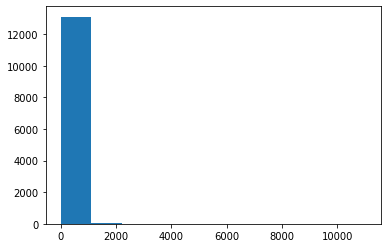

,length
mean,140.258972
std,230.168801
mode,104.000000
min,1.000000
q1,29.000000
median,85.000000
q3,111.000000
max,11008.000000
iqr,82.000000
outlier,234.000000


In [4]:
profile_stat_df = basic_statistics(profile_length)
plt.hist(profile_length) #,bins=[10,20,30,40,50,60,70,80,90,100,110]
plt.show()
pro_df = pd.DataFrame(data={'profile':sorted(profile_length)})
# pro_df.to_excel('data/tree-rep-profiles_o2o/profile_dist_overall_woLoners.xlsx',index=False)
profile_stat_df

### 計算normal processes length dist
* o2m original normal
* assertion test for checking dataset

In [19]:
# corpus = []
# window_size = 6
# dil= r"[,.;\-+^()/@#?!&$:{}\\*%~\'\"]+\ *" #等號、底線被保留
root_dir = './data/tree-rep-profiles_o2o/small_short/'
fam_dir = next(os.walk(root_dir))[1]
# api_length = []
profile_length = []
processed_profile = []
count = 0

for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        if len(hl_list) > 2:
            rep = pickle.load(open(in_directory + 'rep.pickle','rb'))
            rep = sum(rep,[])
            if len(rep)>10:
#                 count = count + 1 #normal
                print('ERR:',in_directory) #small_short
        for profile in hl_list:
            name = profile.split('/')[-1]
            if name not in processed_profile:
                with open(profile,encoding='ISO 8859-1') as f:
                    lines = f.read().splitlines()
                processed_profile.append(name)
                profile_length.append(len(lines))

len(processed_profile)

100%|██████████| 159/159 [00:00<00:00, 698.18it/s]


3333

In [9]:
# corpus = []
# window_size = 6
# dil= r"[,.;\-+^()/@#?!&$:{}\\*%~\'\"]+\ *" #等號、底線被保留
root_dir = './data/tree-rep-profiles_o2o/normal/'
fam_dir = next(os.walk(root_dir))[1]
# api_length = []
profile_length = []
processed_profile = []
count = 0

for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        if len(hl_list) < 3:
            print('ERR:',hl_list)
        rep = pickle.load(open(in_directory + 'rep.pickle','rb'))
        rep = sum(rep,[])
        if len(rep)<10:
#                 count = count + 1 #normal
            print('ERR:',in_directory) #small_short
        for profile in hl_list:
            name = profile.split('/')[-1]
            if name not in processed_profile:
                with open(profile,encoding='ISO 8859-1') as f:
                    lines = f.read().splitlines()
                processed_profile.append(name)
                profile_length.append(len(lines))

len(processed_profile)

100%|██████████| 135/135 [00:01<00:00, 119.02it/s]


9819

In [15]:
in_directory = './data/tree-rep-profiles_o2o_smallshort/short/151.brresmon_0.8/G17/'

In [16]:
rep = pickle.load(open(in_directory + 'rep.pickle','rb'))
byte = pickle.load(open(in_directory + '3fb338d03c574cb7535ab5735de39eaf5c82c37f26b500f95aace158972cbb3b_2960_byterep.pickle'
                        ,'rb'))

In [17]:
byte , in_directory

([1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1],
 './data/tree-rep-profiles_o2o_smallshort/short/151.brresmon_0.8/G17/')

In [18]:
len(byte)

32

In [26]:
rep

[['RegQueryValue#PR@HKLM@sys_curCtlSet_ctl_sessionManager\\*#PR@SUBK@criticalsectiontimeout#PR@0#PR@12f9b0#Ret#0',
  'RegQueryValue#PR@HKLM@soft_ms_ole\\*#PR@SUBK@rwlockresourcetimeout#PR@0#PR@12f9b4#Ret#P',
  'RegQueryValue#PR@HKLM@soft_ms_ole\\*#PR@SUBK@minimumfreemempercentagetocreateprocess#PR@12f9b8#PR@12f9b4#Ret#P',
  'RegQueryValue#PR@HKLM@soft_ms_ole\\*#PR@SUBK@minimumfreemempercentagetocreateobject#PR@12f9b8#PR@12f9b4#Ret#P',
  'RegQueryValue#PR@HKLM@sys_setup\\#PR@SUBK@systemsetupinprogress#PR@REG_DWORD#PR@0#Ret#0',
  'LoadLibrary#PR@ARB@windowsshell@MANIFEST#Ret#N',
  'CreateFile#PR@ARB@MANIFEST#PR@GENERIC_READ#PR@OPEN_EXISTING#PR@FILE_SHARE_DELETE;FILE_SHARE_READ#Ret#0',
  'RegQueryValue#PR@HKCU@desktop\\#PR@SUBK@smoothscroll#PR@0#PR@77462a48#Ret#P',
  'RegQueryValue#PR@HKCU@soft_ms_win_explorer\\advanced#PR@SUBK@enableballoontips#PR@0#PR@77462170#Ret#P',
  'RegEnumValue#PR@HKLM@soft_ms_winNT_languagepack\\*#PR@SUBK@surr#PR@REG_DWORD#PR@2#Ret#0',
  'RegQueryValue#PR@HKCU@de

In [28]:
rep= sum(rep,[])
len(rep)

25

In [6]:
root_dir = './data/tree-rep-profiles-partial/'
profile = '6fb1ab2ea32499ee45ca81efb62f85aaf80a528511ec8841bb8c14713a02dfa9_2932.profile'
# profile = '78f986761db48863d3fb54fd0b346df84a123c7e4b87384abaccf592cb3d40d8_3228.profile'
paths = glob.glob(root_dir + '*/*/*/'+profile)
paths

['./data/tree-rep-profiles-partial/normal/4.zbot_0.8/G1332/6fb1ab2ea32499ee45ca81efb62f85aaf80a528511ec8841bb8c14713a02dfa9_2932.profile']

In [38]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
x = np.array([[[0,1],[0,1],[1,1]],[[1,1],[0,1],[0,1]]])
y = [1,2]
clf = NearestCentroid()
clf.fit(x,y)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [39]:
x = np.array([[[0,1],[0,1],[1,1]],[[1,1],[0,1],[0,1]]])
print(x.shape)
y = np.array([[0,1],[1,0],[0,1]])
y2 = np.array([[0,1],[1,0]])
sklearn.metrics.pairwise.cosine_similarity(y,y2)

(2, 3, 2)


array([[1., 0.],
       [0., 1.],
       [1., 0.]])

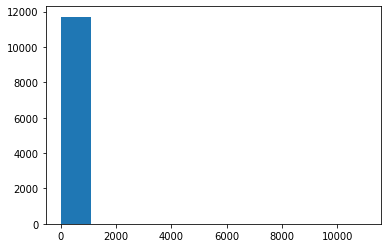

,length
mean,104.100793
std,204.068370
mode,104.000000
min,1.000000
q1,24.000000
median,69.000000
q3,104.000000
max,11008.000000
iqr,80.000000
outlier,224.000000


In [8]:
profile_stat_df = basic_statistics(profile_length)
plt.hist(profile_length) #,bins=[10,20,30,40,50,60,70,80,90,100,110]
plt.show()
pro_df = pd.DataFrame(data={'profile':sorted(profile_length)})
pro_df.to_excel('data/tree-rep-profiles_o2o/profile_dist_smallshort.xlsx',index=False)
profile_stat_df

## statistics
* 從此開始跑
* 需要tree-rep-profiles_one2one (read only)
* 需要 tree-rep-profiles_o2o (write)

In [2]:
root_dir = './data/tree-rep-profiles_one2one/normal/'
fam_dir_normal = next(os.walk(root_dir))[1]
fam_dir_normal

['151.brresmon_0.8',
 '18.domaiq_0.8',
 '85.ipamor_0.8',
 '75.crytex_0.8',
 '65.smshoax_0.8',
 '61.virlock_0.8',
 '79.lydra_0.8',
 '11.zusy_0.8',
 '2.zbot_0.8',
 '82.madangel_0.8',
 '158.amonetize_0.8',
 '26.autoit_0.8',
 '139.softonic_0.8',
 '148.dldpk_0.8',
 '57.vilsel_0.8',
 '77.bifrose_0.8',
 '25.browsefox_0.8',
 '137.vbna_0.8',
 '118.asoecem_0.8',
 '20.ramnit_0.8',
 '101.banker_0.8',
 '19.installcore_0.8',
 '17.sality_0.8',
 '53.killav_0.8',
 '51.ircbot_0.8',
 '70.lollipop_0.8',
 '72.gamevance_0.8',
 '113.ipz_0.8',
 '16.sytro_0.8',
 '48.upatre_0.8',
 '132.fareit_0.8',
 '30.kdz_0.8',
 '64.hupigon_0.8',
 '55.medfos_0.8',
 '93.casino_0.8',
 '6.virut_0.8',
 '59.installrex_0.8',
 '91.loring_0.8',
 '63.aira_0.8',
 '5.ursu_0.8',
 '12.expiro_0.8',
 '92.valla_0.8',
 '84.vbkrypt_0.8',
 '112.installmonetizer_0.8',
 '31.elkern_0.8',
 '32.outbrowse_0.8',
 '13.vobfus_0.8',
 '40.msil_0.8',
 '15.graftor_0.8',
 '4.kazy_0.8',
 '7.solimba_0.8',
 '129.dealply_0.8',
 '41.ibryte_0.8',
 '9.loadmoney_0.8

In [3]:

root_dir = './data/tree-rep-profiles_one2one/'
# api_length = []
process_lengths_normal = []
process_lengths_overall = []
rep_length_normal = []
rep_length_overall = []
tree_samples_normal = []
tree_samples_overall = []
tree_processes_normal = []
tree_processes_overall = []
sample_processes_normal = {}
sample_processes_overall = {}
fam_processes_normal = []
fam_processes_overall = dict.fromkeys(fam_dir_normal,0)
fam_samples_normal = []
fam_samples_overall = dict.fromkeys(fam_dir_normal,0)
# processed_profile = []
trees_normal = []
trees_overall = dict.fromkeys(fam_dir_normal,0) 

rasmma_dir = next(os.walk(root_dir))[1]
for rasmma in rasmma_dir:
    fam_dir = next(os.walk(root_dir+rasmma))[1]
    for fam in tqdm(fam_dir):
        if fam not in fam_dir_normal:
            continue
        tree_dir = next(os.walk(root_dir +rasmma+'/'+ fam))[1]
        if rasmma == 'normal':
#             assert len(tree_dir)>2
            trees_normal.append(len(tree_dir))
        trees_overall[fam] = trees_overall[fam] + len(tree_dir)
        fam_processes = 0
        fam_sample = []
        fam_sample_all = []
        for tree in tree_dir:
            in_directory = root_dir+ rasmma+'/'+ fam +  '/' + tree + '/'
            hl_list = next(os.walk(in_directory))[2]
            hl_list = [os.path.join(in_directory, f) for f in hl_list]
            hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
            rep = pickle.load(open(in_directory + 'rep.pickle','rb'))
            rep = sum(rep,[])
            fam_processes_overall[fam] = fam_processes_overall[fam] + len(hl_list)
            if rasmma == 'normal':
                assert len(rep) > 10
                assert len(hl_list) > 2
                rep_length_normal.append(len(rep))
                tree_processes_normal.append(len(hl_list))
                fam_processes = fam_processes + len(hl_list)
            rep_length_overall.append(len(rep))
            tree_processes_overall.append(len(hl_list))
            
            tree_samples = []
            for profile in hl_list:
                hash_sample = profile.split('/')[-1].split('_')[0]
                tree_samples.append(hash_sample)
                try:
                    sample_processes_overall[hash_sample] = sample_processes_overall[hash_sample] + 1
                except KeyError:
                    sample_processes_overall[hash_sample] = 1
                
#                 tree_samples_overall.append(hash_sample)
#                 name = profile.split('/')[-1]
#                 if name not in processed_profile:
                with open(profile,encoding='ISO 8859-1') as f:
                    lines = f.read()
                lines = re.sub(r'[^\x00-\x7F]+','', lines)
                lines = re.sub(r'[\x1e\x7f\x15\x10\x0c]+','', lines)
                lines = lines.splitlines()
#                     processed_profile.append(name)
                fam_sample_all.append(hash_sample)
                if rasmma == 'normal':
                    process_lengths_normal.append(len(lines))
                    fam_sample.append(hash_sample)
                    try:
                        sample_processes_normal[hash_sample] = sample_processes_normal[hash_sample] + 1
                    except KeyError:
                        sample_processes_normal[hash_sample] = 1
                process_lengths_overall.append(len(lines))
            tree_samples_overall.append(len(set(tree_samples)))
            if rasmma == 'normal':
                tree_samples_normal.append(len(set(tree_samples)))
        fam_samples_overall[fam] = fam_samples_overall[fam] + len(set(fam_sample_all))
        if rasmma == 'normal':
            fam_processes_normal.append(fam_processes)
            fam_samples_normal.append(len(set(fam_sample)))
#                 else:
#                     paths = glob.glob(root_dir + '*/*/*/'+profile.split('/')[-1])
#                     print('duplicate ERR:',paths)

assert len(trees_normal) == len(fam_dir_normal) == len(fam_processes_normal) == len(fam_samples_normal)
assert sum(trees_normal) == len(tree_samples_normal) == len(tree_processes_normal)
# len(processed_profile)

100%|██████████| 159/159 [00:01<00:00, 123.00it/s]


In [4]:
def output_xlsx(statistics,i):
    '''
    Input: list or dict. i for iter
    Output: xlsx
    '''
    output_root_path = 'data/tree-rep-profiles_o2o/df' + str(i+1) + '.xlsx'
    try:
        df = basic_statistics(statistics)
    except TypeError:
        df = basic_statistics(list(statistics.values()))
    df.to_excel(output_root_path,index=True,sheet_name='df'+str(i+1))
    return df

In [7]:
df_all_list = []
for i,stat in enumerate([trees_normal,trees_overall,process_lengths_normal,process_lengths_overall
                         ,rep_length_normal,rep_length_overall,tree_samples_normal,tree_processes_normal,
                        tree_samples_overall,tree_processes_overall,fam_samples_normal,fam_processes_normal,
                        fam_samples_overall,fam_processes_overall,sample_processes_normal,sample_processes_overall]):
    df_all_list.append(output_xlsx(stat,i))
df_all_list[-1]

,length
mean,1.461927
std,1.271672
mode,1.000000
min,1.000000
q1,1.000000
median,1.000000
q3,1.000000
max,20.000000
iqr,0.000000
outlier,1.000000


In [8]:
Counter(list(sample_processes_overall.values()))

Counter({1: 6766,
         2: 1474,
         4: 293,
         9: 12,
         8: 38,
         3: 150,
         6: 37,
         7: 39,
         11: 1,
         5: 58,
         10: 11,
         12: 7,
         15: 3,
         14: 6,
         20: 2,
         17: 2,
         13: 2,
         16: 2,
         18: 1})

## outlier remove to 5.long

In [9]:
outlier_len_profile = df_all_list[2].loc['outlier'].values[0] #outlier
outlier_len_profile

216.0

In [10]:
# corpus = []
# window_size = 6
# dil= r"[,.;\-+^()/@#?!&$:{}\\*%~\'\"]+\ *" #等號、底線被保留
mv_dir = './data/tree-rep-profiles_o2o/5.long/'
root_dir = './data/tree-rep-profiles_o2o/normal/'
fam_dir = next(os.walk(root_dir))[1]
remove_pids = 0
nobyteseq = 0

for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        for profile in hl_list:
            with open(profile,encoding='ISO 8859-1') as f:
                lines = f.read().splitlines()
            if len(lines)> outlier_len_profile:
                dest_path = mv_dir + fam + '/' + tree + '/'
                if not os.path.exists(dest_path):
                    os.makedirs(dest_path,exist_ok=True)
                shutil.move(profile,dest_path+profile.split('/')[-1])
                byteseq = profile.split('.profile')[0] + '_byterep.pickle'
                try:
                    shutil.move(byteseq,dest_path+byteseq.split('/')[-1])
                except FileNotFoundError:
                    print(fam,tree)
                    nobyteseq +=1
                remove_pids +=1
print('remove processes:',remove_pids,'No byteseq:',nobyteseq)
#remove processes: 1759

100%|██████████| 135/135 [00:00<00:00, 281.75it/s]

remove processes: 1759 No byteseq: 0


In [11]:
def statistic_hash_pids(root_dir):
    fam_dir = next(os.walk(root_dir))[1]
    all_pids= []
    all_pid_list = []
    tree_count = 0
    for fam in tqdm(fam_dir):
        tree_dir = next(os.walk(root_dir + fam))[1]
        tree_count += len(tree_dir)
        for tree in tree_dir:
            in_directory = root_dir + fam +  '/' + tree + '/'
            hl_list = next(os.walk(in_directory))[2]
            hl_list = [os.path.join(in_directory, f) for f in hl_list]
            hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
            hash_list = [f.split('/')[-1].split('_')[0] for f in hl_list]
            pid_list = [f.split('/')[-1] for f in hl_list]
            all_pids.extend(hash_list)
            all_pid_list.extend(pid_list)
#             print(fam,len(hash_list)) #DEBUG
    all_hash = set(all_pids)
    print('Families#:',len(fam_dir),'Samples#:',len(all_hash),',Processes#:',len(set(all_pid_list)),',Trees#:',tree_count)
    return all_hash, list(set(all_pid_list))

In [12]:
temp = statistic_hash_pids(mv_dir)

100%|██████████| 71/71 [00:00<00:00, 2783.06it/s]

Families#: 71 Samples#: 1631 ,Processes#: 1759 ,Trees#: 233


In [15]:
#要多執行幾次直到把空fam或是tree皆移除
root_dir = './data/tree-rep-profiles_o2o/normal/'
fam_dir = next(os.walk(root_dir))[1]
empty_tree = 0
empty_fam = 0
for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    fam_tree = {}
    if len(tree_dir) == 0:
        shutil.move(root_dir + fam  ,mv_dir+fam)
        empty_fam +=1
        print(fam)
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        if len(hl_list) == 0: #移除tree底下的member僅有0個者
            shutil.move(root_dir + fam +  '/' + tree ,mv_dir+fam+'/'+tree)
            empty_tree +=1
print('Empty Tree#:',empty_tree,'Empty Fam#:',empty_fam)


all_hash,all_pid_list = statistic_hash_pids(root_dir)

100%|██████████| 130/130 [00:00<00:00, 2709.24it/s]

Empty Tree#: 0 Empty Fam#: 0
Families#: 130 Samples#: 5952 ,Processes#: 8060 ,Trees#: 785


In [16]:
root_dir = './data/tree-rep-profiles_o2o_smallshort/small/'
tmp = statistic_hash_pids(root_dir)
root_dir = './data/tree-rep-profiles_o2o_smallshort/short/'
tmp = statistic_hash_pids(root_dir)

100%|██████████| 159/159 [00:00<00:00, 4514.95it/s]

Families#: 157 Samples#: 1796 ,Processes#: 2274 ,Trees#: 1189
Families#: 159 Samples#: 2418 ,Processes#: 3333 ,Trees#: 1351


## Train, Dev, Test split
* 拿tree數量sample的10%給valid、10%給test
* 不足此數量的tree跳過
* 拿回該sample所有在fam tree的process (僅第一種還原fam方法才有)

In [24]:
root_dir = './data/tree-rep-profiles_o2o/normal/'
fam_dir = next(os.walk(root_dir))[1]

valid_dir = './data/tree-rep-profiles_o2o/DEV/'
test_dir = './data/tree-rep-profiles_o2o/TEST/'

In [133]:
# 此做法為希望系統可以還原family，而非評估individual tree rep，依照sample來分並且會拿process
'''for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        hash_list = list(set([x.split('/')[-1].split('_')[0] for x in hl_list]))
        if len(hash_list)>10:# 從各tree拿一個sample給dev一個給test
#             dest_path = valid_dir + fam + '/' + tree + '/'
#             if not os.path.exists(dest_path):
#                 os.makedirs(dest_path,exist_ok=True)
            inf_idx = random.sample(range(0,len(hash_list)),int(len(hash_list)*0.2))
            valid_idx = random.sample(inf_idx,int(len(inf_idx)/2))
            test_idx = list(set(inf_idx)-set(valid_idx))
            valid_hash = [hash_list[x] for x in valid_idx]
            test_hash = [hash_list[x] for x in test_idx]
            valid_paths = []
            for valid in valid_hash:
                paths = glob.glob(root_dir + '*/*/' + valid + '*')
                valid_paths.extend(paths)
            test_paths = []
            for test in test_hash:
                paths = glob.glob(root_dir + '*/*/' + test + '*')
                test_paths.extend(paths)  
            for source_path in valid_paths:
                dest_path = source_path.replace(root_dir.split('/')[-2],valid_dir.split('/')[-2])
                dev_dir = '/'.join(dest_path.split('/')[:-1]) + '/'
                if not os.path.exists(dev_dir):
                    os.makedirs(dev_dir,exist_ok=True)
                shutil.move(source_path,dest_path)
            for source_path in test_paths:
                dest_path = source_path.replace(root_dir.split('/')[-2],test_dir.split('/')[-2])
                dev_dir = '/'.join(dest_path.split('/')[:-1]) + '/'
                if not os.path.exists(dev_dir):
                    os.makedirs(dev_dir,exist_ok=True)
                shutil.move(source_path,dest_path)
            '''

100%|██████████| 130/130 [00:12<00:00, 10.12it/s]


In [36]:
# 此做法為還原tree，依照process來分
for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
#         hash_list = list(set([x.split('/')[-1].split('_')[0] for x in hl_list]))
        if len(hl_list)>10:# 從各tree拿一個sample給dev一個給test
#             dest_path = valid_dir + fam + '/' + tree + '/'
#             if not os.path.exists(dest_path):
#                 os.makedirs(dest_path,exist_ok=True)
            inf_idx = random.sample(range(0,len(hl_list)),int(len(hl_list)*0.2))
            valid_idx = random.sample(inf_idx,int(len(inf_idx)/2))
            test_idx = list(set(inf_idx)-set(valid_idx))
            valid_paths = [hl_list[x] for x in valid_idx]
            test_paths = [hl_list[x] for x in test_idx]
#             valid_paths = []
#             for valid in valid_pid:
#                 paths = glob.glob(root_dir + '*/*/' + valid + '*')
#                 valid_paths.extend(paths)
#             test_paths = []
#             for test in test_pid:
#                 paths = glob.glob(root_dir + '*/*/' + test + '*')
#                 test_paths.extend(paths)  
            for source_path in valid_paths:
                dest_path = source_path.replace(root_dir.split('/')[-2],valid_dir.split('/')[-2])
                dev_dir = '/'.join(dest_path.split('/')[:-1]) + '/'
                if not os.path.exists(dev_dir):
                    os.makedirs(dev_dir,exist_ok=True)
                shutil.move(source_path,dest_path)
            for source_path in test_paths:
                dest_path = source_path.replace(root_dir.split('/')[-2],test_dir.split('/')[-2])
                dev_dir = '/'.join(dest_path.split('/')[:-1]) + '/'
                if not os.path.exists(dev_dir):
                    os.makedirs(dev_dir,exist_ok=True)
                shutil.move(source_path,dest_path)
            

100%|██████████| 130/130 [00:00<00:00, 1756.26it/s]


In [38]:
temp = statistic_hash_pids(root_dir)
temp = statistic_hash_pids(valid_dir)
temp = statistic_hash_pids(test_dir)


100%|██████████| 45/45 [00:00<00:00, 12537.78it/s]

Families#: 130 Samples#: 5358 ,Processes#: 7103 ,Trees#: 785
Families#: 45 Samples#: 435 ,Processes#: 451 ,Trees#: 133
Families#: 45 Samples#: 480 ,Processes#: 506 ,Trees#: 133


## Loners similarity computation
* 取出實驗家族exp_fam所含有的profiles
* 利用RasMMA計算是否是跟自己家族的行為樹最相近
* 如果是就把它移到exp_dir

In [39]:
root_dir = './data/tree-rep-profiles_o2o/normal/'
loner_dir = './data/tree-rep-profiles_o2o_loner/'
exp_dir = './data/tree-rep-profiles_o2o/EXP/'

exp_fam = next(os.walk(test_dir))[1] #改align root_dir? 要進行家族歸類的家族
exp_fam_dir = [x.split('_')[0] for x in exp_fam]
exp_fam_dir

['18.domaiq',
 '85.ipamor',
 '79.lydra',
 '11.zusy',
 '2.zbot',
 '26.autoit',
 '57.vilsel',
 '25.browsefox',
 '20.ramnit',
 '17.sality',
 '16.sytro',
 '55.medfos',
 '6.virut',
 '5.ursu',
 '12.expiro',
 '32.outbrowse',
 '13.vobfus',
 '15.graftor',
 '4.kazy',
 '7.solimba',
 '52.megasearch',
 '14.hotbar',
 '45.bdmj',
 '29.parite',
 '1.fakeav',
 '37.somoto',
 '8.fakealert',
 '62.directdow',
 '39.sirefef',
 '50.shodi',
 '24.softpulse',
 '312.katusha',
 '96.pcclient',
 '58.picsys',
 '54.fesber',
 '22.razy',
 '73.yantai',
 '10.symmi',
 '33.mira',
 '49.eggnog',
 '23.mplug',
 '3.allaple',
 '35.morstar',
 '69.clickdownload',
 '68.installerex']

RasMMA similarity function

In [40]:
%run Alignment_Fast3.ipynb

# Doing global alignment and find commonAPISequence.
def do_globalAlignment(rep1, rep2):
    '''
    Input: 兩個1D list (profile(rep1) , rep(rep2))
    Output: 一個1D list (common)
    '''
    # Aligment
    commonAPISequence = []
    alignment_result = globalAlign( rep1, rep2, score_matched=10, score_mismatched=-1, score_gap=0)[2]
    common_motif_sequence = motif_delimit(alignment_result)
    return common_motif_sequence

# input: two R
# output: new Rep's common motif sequence of input CMS;
def get_Rep_CommMotifSeq(Ri, Rj):
    '''
    Input: 兩個1D list (profile(Ri) , rep(Rj))
    Output: common motif 1D list
    '''
    rep1 = Ri
    rep2 = Rj
    repNew_CMS = []
#     print(rep2)
    if(rep1 and rep2):
#         print("===in rep1 and rep2===")
        commonSequence = do_globalAlignment(rep1, rep2) # do Alignment
#         print(commonSequence)
        repNew = commonSequence
    else: ##ADD
        repNew = [] #ADD
#     print('===out===')
    return repNew

# compute score of Rnew
# the score calculate method is the length ratio of new to origin one
def compute_Score(Ri, Rj, Rnew):
    '''
    Input: 3個 1D list (Profile(Ri), Rep(Rj), Common(Rnew))
    Output: 相似度分數
    '''
    if(Rnew):
        repI = Ri
        repJ = Rj
        repNew = Rnew
        L_Ri = len(repI)
        L_Rj = len(repJ)
        Lorg = max(L_Ri, L_Rj)
        Lnew = len(repNew)
        return float(Lnew)/Lorg
    else:
        return 0

In [41]:
count_accept_loner = 0 # 1 hr
accept_loner_paths = []
max_scores = []

for fam in tqdm(exp_fam_dir):
    in_directory = loner_dir+ fam+'/' + 'G0' + '/'
    profiles = next(os.walk(in_directory))[2]
    hl_list = [os.path.join(in_directory, f) for f in profiles]
    hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
    for profile in hl_list:
        with open(profile,encoding='ISO 8859-1') as f:
            lines = f.read()
        lines = re.sub(r'[^\x00-\x7F]+','', lines)
        lines = re.sub(r'[\x1e\x7f\x15\x10\x0c]+','', lines)
        lines = lines.splitlines() #Ri
        if len(lines) > outlier_len_profile: #太長的放不進去model
            continue
        ori_fam = fam+'_0.8'
        ori_rep_trees = next(os.walk(root_dir + ori_fam + '/'))[1] # 原所屬家族tree的rep找出來
        ori_scores = []
        for tree in ori_rep_trees:
            rep_directory = root_dir + ori_fam + '/' + tree + '/' + 'rep.pickle'
            rep = pickle.load(open(rep_directory,'rb'))
            rep = sum(rep,[])
            common = get_Rep_CommMotifSeq(lines,rep)
            score = compute_Score(lines,rep,common)
            ori_scores.append(score)
        ori_max_score = max(ori_scores)
        flag = True
        rest_dir = list(set(exp_fam) - set([ori_fam]))
        for rep_dir in rest_dir:
            rep_trees = next(os.walk(root_dir + rep_dir + '/'))[1]
            for tree in rep_trees:
                rep_directory = root_dir + rep_dir + '/' + tree + '/' + 'rep.pickle'
                rep = pickle.load(open(rep_directory,'rb'))
                rep = sum(rep,[])
                common = get_Rep_CommMotifSeq(lines,rep)
                score = compute_Score(lines,rep,common)
                if score > ori_max_score: #loner跟別的家族tree分數比較高
                    flag = False
                    break
            if flag == False:
                break
        if (flag == True) and (score>0):
            accept_loner_paths.append(profile)
            max_scores.append(ori_max_score)
            count_accept_loner+=1
assert len(accept_loner_paths) == count_accept_loner == len(max_scores)
print(count_accept_loner)

100%|██████████| 45/45 [45:05<00:00, 22.90s/it]   

743


In [56]:
final_lon = []
final_hash_lon = []
final_fam_lon = []
final_score = []
for lon,score in zip(accept_loner_paths,max_scores):
    hash_lon = lon.split('/')[-1].split('_')[0]
    fam_name = lon.split('/')[3]
    if score>0:
        final_lon.append(lon)
        final_hash_lon.append(hash_lon)
        final_fam_lon.append(fam_name)
        final_score.append(score)
final_hash_lon = list(set(final_hash_lon))
assert len(final_hash_lon) <= len(final_lon)
print('Processes#:',len(final_lon),'Hash#:',len(final_hash_lon))
final_fam_lon = dict(Counter(final_fam_lon))
len(final_fam_lon)

Processes#: 409 Hash#: 404


34

copy to root_dir

In [70]:
for lon in tqdm(final_lon):
    dest_dir = exp_dir + lon.split('/')[3] + '/'
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir,exist_ok=True)
    shutil.copy(lon,dest_dir+lon.split('/')[-1])

100%|██████████| 409/409 [00:00<00:00, 11687.99it/s]


# Sent2Vec Prepare

In [71]:
dil= r"[,.;\-+^()/@#?!&$:{}\\*%~\'\"\=\_]+\ *" #等號、底線被保留
root_dir = './data/tree-rep-profiles_o2o/normal/'
fam_dir = next(os.walk(root_dir))[1]
api_length = []
profile_length = []

for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        for profile in hl_list:
            with open(profile,encoding='ISO 8859-1') as f:
                lines = f.read().splitlines()
            for line in lines:
                temp = re.sub(dil," ",line.lower())
                temp = temp.split(" ")
                temp = list(filter(None, temp))
                api_length.append(len(temp))

100%|██████████| 130/130 [00:03<00:00, 37.72it/s]


In [72]:
basic_statistics(api_length)

,length
mean,15.239345
std,4.448034
mode,18.000000
min,3.000000
q1,13.000000
median,16.000000
q3,18.000000
max,38.000000
iqr,5.000000
outlier,25.500000
